<a href="https://colab.research.google.com/github/laragazzadelsole/Master-Thesis/blob/main/Master_Thesis_DSE_Sara_Gironi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environmental Charges and International Aviation: Leveraging Airline Supply Elasticity to Mitigate CO2 Emissions in Alignment with ICAO 2050 Target.
Master Thesis in Data Science and Economics by Sara Gironi, student ID 976803.

Thesis supervisor: Prof. Massimiliano Bratti

Thesis co-supervisor: Prof. Lorenzo Zirulia

Academic Year 2022/2023.

This research investigates the feasibility of implementing an environmental charge as an alternative to the Carbon Offsetting and Reduction Scheme for International Aviation (CORSIA) in the aviation industry's pursuit of net-zero carbon emissions by 2050. CORSIA aims to offset emissions through carbon-offsetting projects, but concerns exist regarding its effectiveness.

The study analyzes how airline companies respond to increased airport charges, focusing on their impact on flight frequencies and carbon emissions at major airports. Data spanning 2017-2022, covering 87 major airports and various flight scenarios, is used to draw conclusions.


## **1. DATA PREPARATION**

In [ ]:
import os

import pandas as pd
import numpy as np
from sklearn import metrics

import statsmodels.api as sm
import statsmodels.formula.api as smf
from google.colab import drive
from statsmodels.iolib.summary2 import summary_col
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Folder path containing data on airport charges 2017, 2019, 2021, 2023
folder_path = '/content/drive/My Drive/DSE Master Thesis/Data on airport charges/'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Iterate through each file and read it as a separate dataframe
#dataframes = []
transposed_dataframes= []
for file_name in file_list:
    if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, sheet_name = 5, header = 0)
        df = df.drop_duplicates()

        transposed_df = df.transpose()
        transposed_df.columns = transposed_df.iloc[0]
        transposed_dataframes.append(transposed_df.drop(transposed_df.index[0]))

Mounted at /content/drive


In [ ]:
# Folder path containing data on airport charges 2018

folder_path_2018 = '/content/drive/My Drive/DSE Master Thesis/Data on airport charges/Airport charges 2018'

file_list_2018 = os.listdir(folder_path_2018)

list_df_2018 = []
for file in file_list_2018:
    #if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
      file_path = os.path.join(folder_path_2018, file)
      df = pd.read_excel(file_path, sheet_name = 2, header = 0)
      df = df.drop_duplicates()

      transposed_df_2018 = df.transpose()
      transposed_df_2018.columns = transposed_df_2018.iloc[0]
      transposed_dataframes.append(transposed_df_2018.drop(transposed_df_2018.index[0]))

In [ ]:
unique_columns = ['Study Name',
  'Study Airport',
  'Arrival From',
  'Departure To',
  'Equipment Name',
  'Passengers',
  'Transfer Passengers',
  'Transit Passengers',
  'Parking Hours',
  'Frequencies',
  'MTOW',
  'Capacity',
  'Load Factor',
  'Departure Time',
  'Air Navigation Charges',
  'Arrival Time',
  'Carrier Name',
  'Currency',
  'Infrastructure Charges',
  'Government Charges',
  'Passenger Security Charges',
  'Passenger Charges',
  'Aircraft Security Charges',
  'Runway Charges',
  'Parking Charges',
  'Cargo Charges',
  'CustomCharges',
  'Fuel Price',
  'Total',
  'Average Per Passenger',
  'Currency Rates']

In [ ]:
final_dataframes = []
for df in transposed_dataframes:
  for col in unique_columns:
    if col not in df.columns:
      new_column = pd.Series(np.zeros(len(df)), index=df.index)
      df[col] = new_column

  final_dataframes.append(df[unique_columns])

In [ ]:
airport_charges_df = pd.concat(final_dataframes)
airport_charges_df.shape

(1632, 31)

In [ ]:
airport_charges_df.head()

Study Tab,Study Name,Study Airport,Arrival From,Departure To,Equipment Name,Passengers,Transfer Passengers,Transit Passengers,Parking Hours,Frequencies,...,Passenger Charges,Aircraft Security Charges,Runway Charges,Parking Charges,Cargo Charges,CustomCharges,Fuel Price,Total,Average Per Passenger,Currency Rates
ATL/320,A320,Hartsfield-Jackson Atlanta International Airpo...,Mexico City - Juarez International Airport (ME...,Mexico City - Juarez International Airport (ME...,A320,122,0,0,2,1,...,499.6449,0.0,106.68579,345.838,0.0,0,1.806,7511.941965,61.573295,USD to EUR: 0.9101000000000000000
ATL/320.1,A320,Hartsfield-Jackson Atlanta International Airpo...,Mexico City - Juarez International Airport (ME...,Mexico City - Juarez International Airport (ME...,A320,122,0,0,2,1,...,499.6449,0.0,37.132772,345.838,0.0,0,1.369,7533.917704,61.753424,USD to EUR: 0.9101000000000000000
ATL/320.2,A320,Hartsfield-Jackson Atlanta International Airpo...,Mexico City - Juarez International Airport (ME...,Mexico City - Juarez International Airport (ME...,A320,122,0,0,2,1,...,499.6449,0.0,99.261058,345.838,0.0,0,1.984,7759.263324,63.600519,USD to EUR: 0.9101000000000000000
ATL/320.3,A320,Hartsfield-Jackson Atlanta International Airpo...,Mexico City - Juarez International Airport (ME...,Mexico City - Juarez International Airport (ME...,A320,122,0,0,2,1,...,499.6449,0.0,123.806273,345.838,0.0,0,1.748,7919.267823,64.912031,USD to EUR: 0.9101000000000000000
ATL/320.4,A320,Hartsfield-Jackson Atlanta International Airpo...,Mexico City - Juarez International Airport (ME...,Mexico City - Juarez International Airport (ME...,A320,122,0,0,2,1,...,499.6449,0.0,64.72076,345.838,0.0,0,2.502,8363.158176,68.550477,USD to EUR: 0.9101000000000000000


In [ ]:
# Change the index to a column to extract airport codes

airport_charges_df = airport_charges_df.rename_axis('Study Tab').reset_index()
airport_charges_df['originairportcode'] = airport_charges_df['Study Tab'].str[:3]
airport_charges_df['originairportcode']


0       ATL
1       ATL
2       ATL
3       ATL
4       ATL
       ... 
1627    AYT
1628    DME
1629    LTN
1630    VKO
1631    CJU
Name: originairportcode, Length: 1632, dtype: object

In [ ]:
#create a new column with the code of the destination airport

airport_charges_df['destinationairportcode'] = [s[-11:-8] if len(s) >= 12 else s for s in airport_charges_df['Departure To']]
airport_charges_df['destinationairportcode']

0       MEX
1       MEX
2       MEX
3       MEX
4       MEX
       ... 
1627    OSL
1628    IST
1629    IST
1630    DXB
1631    SIN
Name: destinationairportcode, Length: 1632, dtype: object

In [ ]:
# Check data type
print(airport_charges_df.dtypes)

Study Tab
Study Tab                     object
Study Name                    object
Study Airport                 object
Arrival From                  object
Departure To                  object
Equipment Name                object
Passengers                    object
Transfer Passengers           object
Transit Passengers            object
Parking Hours                 object
Frequencies                   object
MTOW                          object
Capacity                      object
Load Factor                   object
Departure Time                object
Air Navigation Charges        object
Arrival Time                  object
Carrier Name                  object
Currency                      object
Infrastructure Charges        object
Government Charges            object
Passenger Security Charges    object
Passenger Charges             object
Aircraft Security Charges     object
Runway Charges                object
Parking Charges               object
Cargo Charges               

In [ ]:
# using dictionary to cast type of specific columns
convert_dict = {'Passengers': int,
                'Parking Hours': float,
                'MTOW': int,
                'Capacity': int,
                'Load Factor': int,
                'Departure Time': str,
                'Air Navigation Charges': float,
                'Infrastructure Charges': float,
                'Government Charges': float,
                'Passenger Security Charges': float,
                'Passenger Charges': float,
                'Aircraft Security Charges': float,
                'Runway Charges': float,
                'Parking Charges': float,
                'Cargo Charges': float,
                'Fuel Price': float,
                'Total': float,
                'Average Per Passenger': float,
                'originairportcode': str,
                'destinationairportcode': str
                }

airport_charges_df = airport_charges_df.astype(convert_dict)
print(airport_charges_df.dtypes)


Study Tab
Study Tab                      object
Study Name                     object
Study Airport                  object
Arrival From                   object
Departure To                   object
Equipment Name                 object
Passengers                      int64
Transfer Passengers            object
Transit Passengers             object
Parking Hours                 float64
Frequencies                    object
MTOW                            int64
Capacity                        int64
Load Factor                     int64
Departure Time                 object
Air Navigation Charges        float64
Arrival Time                   object
Carrier Name                   object
Currency                       object
Infrastructure Charges        float64
Government Charges            float64
Passenger Security Charges    float64
Passenger Charges             float64
Aircraft Security Charges     float64
Runway Charges                float64
Parking Charges               float64
Ca

In [ ]:
# Create the 'year' column

airport_charges_df['year'] = airport_charges_df['Departure Time'].str[:4]
airport_charges_df['year'] = airport_charges_df['year'].replace('2023', '2022').astype(int)
airport_charges_df = airport_charges_df[airport_charges_df['year'] != 2015]


In [ ]:
# Drop useless columns

airport_charges_df = airport_charges_df.drop(columns =["Study Name", "Transfer Passengers", "Transit Passengers", "Frequencies", "Carrier Name", "Currency", "CustomCharges", "Departure Time", "Arrival Time"])

In [ ]:
# Upload CO2 emission dataframe

co2_data_path = '/content/drive/My Drive/DSE Master Thesis/Data on flights/CO2_global.dta'

emission_df = pd.read_stata(co2_data_path)
emission_df.head()

,year,originairportcode,originairportname,origincitycode,origincityname,origincountrycode,origincountryname,origincontinentcode,origincontinentname,destinationairportcode,...,averagesectorlength,averagesectorlengthmiles,emissionscheme,totalco2tonnes,co2perseatkg,co2perdeparturetonnes,co2peraskkg,co2perasmkg,origincontinentcode_i,ets
0,2017,BRU,Brussels - National,BRU,Brussels,BE,Belgium,EU,Europe,OTP,...,1838.581421,1142.441528,EU ETS,222.882004,143.702133,20.261999,0.078160,0.048566,EU,1.0
1,2017,GLA,Glasgow International,GLA,Glasgow,GB,"United Kingdom, UK",EU,Europe,OTP,...,2598.333252,1614.529541,EU ETS,110.596001,196.092194,27.649000,0.075456,0.046886,EU,1.0
2,2017,LIN,Milan - Linate,MIL,Milan,IT,Italy,EU,Europe,OTP,...,1386.813354,861.725830,EU ETS,983.940002,112.553192,15.870000,0.081145,0.050421,EU,1.0
3,2017,OTP,Bucharest - Henri Coanda International,BUH,Bucharest,RO,Romania,EU,Europe,BRU,...,1838.581421,1142.441528,EU ETS,222.882004,143.702133,20.261999,0.078160,0.048566,EU,1.0
4,2017,OTP,Bucharest - Henri Coanda International,BUH,Bucharest,RO,Romania,EU,Europe,GLA,...,2598.333252,1614.529541,EU ETS,110.596001,196.092194,27.649000,0.075456,0.046886,EU,1.0


In [ ]:
# Keep only the right years and drop useless columns

emission_df = emission_df[(emission_df.year == 2017)| (emission_df.year == 2018) | (emission_df.year == 2019) | (emission_df.year == 2021) | (emission_df.year == 2022)]
emission_df = emission_df.drop(columns = ['asms', 'averagesectorlengthmiles', 'emissionscheme', 'co2perasmkg', 'origincontinentcode_i', 'ets'])

In [ ]:
# Combine the dataframes

emission_and_charges_df = pd.merge(airport_charges_df, emission_df, on=['originairportcode', 'destinationairportcode', 'year'])
emission_and_charges_df.shape

(6218, 56)

### Add data on income and population
The population data is taken from the World Urbanization Prospects realized by United Nations and it contains annual population of urban agglomerations with 300,000 inhabitants data. The average income data is taken from the World Developement Indicator of the World Bank (in US dollars).

In [ ]:
income_pop_data_path = '/content/drive/My Drive/DSE Master Thesis/Data on flights/income_pop.dta'

income_pop_df = pd.read_stata(income_pop_data_path)
income_pop_df.head()

,airportyear_destination,year,destinationairportcode,destinationairportname,destinationcountryname,destinationcountrycode,income_destination,pop_destination
0,ACC2015,2015,ACC,Accra - Kotoka,Ghana,GH,1940,2289561
1,ACC2016,2016,ACC,Accra - Kotoka,Ghana,GH,1810,2338452
2,ACC2017,2017,ACC,Accra - Kotoka,Ghana,GH,1880,2388388
3,ACC2018,2018,ACC,Accra - Kotoka,Ghana,GH,2120,2439389
4,ACC2019,2019,ACC,Accra - Kotoka,Ghana,GH,2230,2475208


In [ ]:
# Drop the first column

income_pop_df = income_pop_df.iloc[: , 1:]

In [ ]:
# Add income and population for the destination airport

emission_income_and_charges_df = pd.merge(emission_and_charges_df, income_pop_df, on=['destinationairportcode', 'year'])

# Filter the merged DataFrame to keep rows with exact same values

#emission_income_and_charges_df = emission_income_and_charges_df[emission_income_and_charges_df.duplicated(subset=['destinationairportcode', 'year'], keep=False)]
emission_income_and_charges_df.shape

(5876, 61)

In [ ]:
# Add income and population of the origin airport

income_pop_df = income_pop_df.rename(columns = {'destinationairportcode' : 'originairportcode', 'income_destination': 'income_origin', 'pop_destination': 'pop_origin'})

income_pop_df = income_pop_df[['originairportcode', 'income_origin', 'pop_origin', 'year']]
final_df = pd.merge(emission_income_and_charges_df, income_pop_df, on=['originairportcode', 'year'])
final_df.shape

(4551, 63)

In [ ]:
# Get rid of uselss columns

final_df = final_df.drop(['Study Tab', 'Study Airport', 'Arrival From', 'Departure To', 'operatingairlinename', 'operatingairlinecode', 'destinationairportname_y', 'destinationcountryname_y', 'destinationcountrycode_y'], axis = 1)

In [ ]:
# Reorder columns

cols = final_df.columns.tolist()
cols

['Equipment Name',
 'Passengers',
 'Parking Hours',
 'MTOW',
 'Capacity',
 'Load Factor',
 'Air Navigation Charges',
 'Infrastructure Charges',
 'Government Charges',
 'Passenger Security Charges',
 'Passenger Charges',
 'Aircraft Security Charges',
 'Runway Charges',
 'Parking Charges',
 'Cargo Charges',
 'Fuel Price',
 'Total',
 'Average Per Passenger',
 'Currency Rates',
 'originairportcode',
 'destinationairportcode',
 'year',
 'originairportname',
 'origincitycode',
 'origincityname',
 'origincountrycode',
 'origincountryname',
 'origincontinentcode',
 'origincontinentname',
 'destinationairportname_x',
 'destinationcitycode',
 'destinationcityname',
 'destinationcountrycode_x',
 'destinationcountryname_x',
 'destinationcontinentcode',
 'destinationcontinentname',
 'primaryairlinecode',
 'primaryairlinename',
 'aircraftcode',
 'aircraftname',
 'aircraftfamilyname',
 'departingseats',
 'departures',
 'averagecapacity',
 'asks',
 'averagesectorlength',
 'totalco2tonnes',
 'co2persea

In [ ]:
final_df = final_df[['year', 'originairportcode',  'originairportname',
 'origincitycode',
 'origincityname',
 'origincountrycode',
 'origincountryname',
 'origincontinentcode',
 'origincontinentname', 'destinationairportcode',  'destinationairportname_x',
 'destinationcitycode',
 'destinationcityname',
 'destinationcountrycode_x',
 'destinationcountryname_x',
 'destinationcontinentcode',
 'destinationcontinentname',
 'Parking Hours', 'Equipment Name',
 'Passengers',
 'MTOW',
 'Capacity',
 'Load Factor',
 'Air Navigation Charges',
 'Infrastructure Charges',
 'Government Charges',
 'Passenger Security Charges',
 'Passenger Charges',
 'Aircraft Security Charges',
 'Runway Charges',
 'Parking Charges',
 'Cargo Charges',
 'Fuel Price',
 'Total',
 'Average Per Passenger',
 'Currency Rates', 'primaryairlinecode',
 'primaryairlinename',
 'aircraftcode',
 'aircraftname',
 'aircraftfamilyname',
 'departingseats',
 'departures',
 'averagecapacity',
 'asks',
 'averagesectorlength',
 'totalco2tonnes',
 'co2perseatkg',
 'co2perdeparturetonnes',
 'co2peraskkg',
 'income_destination',
 'pop_destination',
 'income_origin',
 'pop_origin']]


In [ ]:
# rename columns to make it more clear

final_df = final_df.rename(columns={
    'asks': 'seats_perkm',
    'co2peraskg': 'co2kg_perseat_perkm',
    'income_destination': 'income_percapita_destination_city',
    'pop_destination': 'destination_population',
    'income_origin': 'income_percapita_origin_city'
})


In [ ]:
final_df = final_df.sort_values(by=['year', 'originairportcode', 'Equipment Name'], ascending=True)

In [ ]:
pd.set_option('display.max_columns', None)
final_df.head()

,year,originairportcode,originairportname,origincitycode,origincityname,origincountrycode,origincountryname,origincontinentcode,origincontinentname,destinationairportcode,destinationairportname_x,destinationcitycode,destinationcityname,destinationcountrycode_x,destinationcountryname_x,destinationcontinentcode,destinationcontinentname,Parking Hours,Equipment Name,Passengers,MTOW,Capacity,Load Factor,Air Navigation Charges,Infrastructure Charges,Government Charges,Passenger Security Charges,Passenger Charges,Aircraft Security Charges,Runway Charges,Parking Charges,Cargo Charges,Fuel Price,Total,Average Per Passenger,Currency Rates,primaryairlinecode,primaryairlinename,aircraftcode,aircraftname,aircraftfamilyname,departingseats,departures,averagecapacity,seats_perkm,averagesectorlength,totalco2tonnes,co2perseatkg,co2perdeparturetonnes,co2peraskkg,income_percapita_destination_city,destination_population,income_percapita_origin_city,pop_origin
3642,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,2.0,A350-900,252,268,315,80,522.65,0.0,0.0,2540.16,3008.88,0.0,1999.28,0.0,0.0,1.369,7671.114,30.440929,EUR to EUR: 1,DL,Delta Air Lines,333,A330-300,Airbus A330 family,61823,211,293,378774062.0,6126.479980,25116.230469,406.260284,119.034264,0.066309,59240,18761941,47110,2800000
3643,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,2.0,A350-900,252,268,315,80,522.65,0.0,0.0,2540.16,3008.88,0.0,1999.28,0.0,0.0,1.369,7671.114,30.440929,EUR to EUR: 1,KL,KLM,332,A330-200,Airbus A330 family,2937,11,267,17994264.0,6126.450195,1271.907959,433.063660,115.627998,0.070684,59240,18761941,47110,2800000
3644,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,2.0,A350-900,252,268,315,80,522.65,0.0,0.0,2540.16,3008.88,0.0,1999.28,0.0,0.0,1.369,7671.114,30.440929,EUR to EUR: 1,KL,KLM,789,B787-9,Boeing 787,27930,95,294,171120124.0,6126.513184,9656.546875,345.741028,101.647865,0.056431,59240,18761941,47110,2800000
3645,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,2.0,A350-900,252,268,315,80,522.65,0.0,0.0,2540.16,3008.88,0.0,1999.28,0.0,0.0,1.369,7671.114,30.440929,EUR to EUR: 1,DL,Delta Air Lines,76W,B767-300 Winglets,Boeing 767,98036,434,225,600642060.0,6126.520020,45126.433594,460.304718,103.977959,0.075130,59240,18761941,47110,2800000
3646,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,2.0,A350-900,252,268,315,80,522.65,0.0,0.0,2540.16,3008.88,0.0,1999.28,0.0,0.0,1.369,7671.114,30.440929,EUR to EUR: 1,KL,KLM,77W,B777-300ER,Boeing 777,833,2,416,5103582.0,6126.660156,308.888000,370.813934,154.444000,0.060523,59240,18761941,47110,2800000


Obtain the mean value per route of the continuous variables.

In [ ]:
# Group by the specified columns and calculate the mean value
grouped = final_df.groupby(['year', 'originairportcode', 'destinationairportcode', 'primaryairlinename'])['departingseats', 'departures', 'averagecapacity', 'seats_perkm',	'averagesectorlength', 'totalco2tonnes',	'co2perseatkg',	'co2perdeparturetonnes',	'co2peraskkg',	'income_percapita_destination_city', 'destination_population',	'income_percapita_origin_city',	'pop_origin'].mean().reset_index()

# Merge the mean values back into the original DataFrame
merged_df = final_df.merge(grouped, on=['year', 'originairportcode', 'destinationairportcode', 'primaryairlinename'], suffixes=('', '_mean'))

merged_df = merged_df.drop(['aircraftcode',	'aircraftname',	'aircraftfamilyname', 'departingseats', 'departures', 'averagecapacity', 'seats_perkm',	'Parking Hours', 'averagesectorlength', 'totalco2tonnes',	'co2perseatkg',	'co2perdeparturetonnes',	'co2peraskkg',	'income_percapita_destination_city', 'destination_population',	'income_percapita_origin_city',	'pop_origin', 'MTOW', 'Fuel Price', 'Currency Rates', 'primaryairlinecode', 'averagecapacity_mean', 'seats_perkm_mean', 'averagesectorlength_mean', 'co2peraskkg_mean'], axis = 1)
# Replace the original 'Value' column with the calculated mean values
#merged_df['Value'] = merged_df['Value_mean']

# Drop the redundant columns
#merged_df = merged_df.drop(['Value_mean'], axis=1)
merged_df.head(20)

<ipython-input-29-71c27ead7a66>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = final_df.groupby(['year', 'originairportcode', 'destinationairportcode', 'primaryairlinename'])['departingseats', 'departures', 'averagecapacity', 'seats_perkm',	'averagesectorlength', 'totalco2tonnes',	'co2perseatkg',	'co2perdeparturetonnes',	'co2peraskkg',	'income_percapita_destination_city', 'destination_population',	'income_percapita_origin_city',	'pop_origin'].mean().reset_index()


,year,originairportcode,originairportname,origincitycode,origincityname,origincountrycode,origincountryname,origincontinentcode,origincontinentname,destinationairportcode,destinationairportname_x,destinationcitycode,destinationcityname,destinationcountrycode_x,destinationcountryname_x,destinationcontinentcode,destinationcontinentname,Equipment Name,Passengers,Capacity,Load Factor,Air Navigation Charges,Infrastructure Charges,Government Charges,Passenger Security Charges,Passenger Charges,Aircraft Security Charges,Runway Charges,Parking Charges,Cargo Charges,Total,Average Per Passenger,primaryairlinename,departingseats_mean,departures_mean,totalco2tonnes_mean,co2perseatkg_mean,co2perdeparturetonnes_mean,income_percapita_destination_city_mean,destination_population_mean,income_percapita_origin_city_mean,pop_origin_mean
0,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.650000,0.000000,0.00000,2540.16,3008.880000,0.0,1999.280000,0.0,0.0,7671.114000,30.440929,Delta Air Lines,79929.500000,322.500000,35121.332031,433.282501,111.506111,59240.0,18761941.0,47110.0,2800000.0
1,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.650000,0.000000,0.00000,2540.16,3008.880000,0.0,1999.280000,0.0,0.0,7671.114000,30.440929,Delta Air Lines,79929.500000,322.500000,35121.332031,433.282501,111.506111,59240.0,18761941.0,47110.0,2800000.0
2,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.650000,0.000000,0.00000,2540.16,3008.880000,0.0,1999.280000,0.0,0.0,7671.114000,30.440929,KLM,35872.666667,119.166667,17896.404297,472.479706,152.341751,59240.0,18761941.0,47110.0,2800000.0
3,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.650000,0.000000,0.00000,2540.16,3008.880000,0.0,1999.280000,0.0,0.0,7671.114000,30.440929,KLM,35872.666667,119.166667,17896.404297,472.479706,152.341751,59240.0,18761941.0,47110.0,2800000.0
4,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.650000,0.000000,0.00000,2540.16,3008.880000,0.0,1999.280000,0.0,0.0,7671.114000,30.440929,KLM,35872.666667,119.166667,17896.404297,472.479706,152.341751,59240.0,18761941.0,47110.0,2800000.0
5,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.650000,0.000000,0.00000,2540.16,3008.880000,0.0,1999.280000,0.0,0.0,7671.114000,30.440929,KLM,35872.666667,119.166667,17896.404297,472.479706,152.341751,59240.0,18761941.0,47110.0,2800000.0
6,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.650000,0.000000,0.00000,2540.16,3008.880000,0.0,1999.280000,0.0,0.0,7671.114000,30.440929,KLM,35872.666667,119.166667,17896.404297,472.479706,152.341751,59240.0,18761941.0,47110.0,2800000.0
7,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.650000,0.000000,0.00000,2540.16,3008.880000,0.0,1999.280000,0.0,0.0,7671.114000,30.440929,KLM,35872.666667,119.166667,17896.404297,472.479706,152.341751,59240.0,18761941.0,47110.0,2800000.0
8,2017,ARN,Stockholm - Arlanda,STO,Stockholm,SE,Sweden,EU,Europe,LIS,Lisbon,LIS,Lisbon,PT,Portugal,EU,Europe,A320,122,153,80,137.81

 Air traffic from Russian airports has been affected since 2021 due to the Russian invasion of Ukraine and the consequent isolation of Russia, therefore I am going to drop observations that have a russian airport as departure origin.

In [ ]:
merged_df = merged_df[merged_df['origincountrycode'] != 'RU']

Also the Berlin Tegel airport was definitely closed in 2020 and substituted by the Berlin-Brandeburg Airport, so I remove it from the data.

In [ ]:
merged_df = merged_df[merged_df['originairportcode'] != 'TXL']

In [ ]:
# Move Turkey and Mexico
merged_df.loc[merged_df['origincountryname'] == 'Turkey', 'origincontinentname'] = 'Middle East'
merged_df.loc[merged_df['origincountryname'] == 'Mexico', 'origincontinentname'] = 'South America'

In [ ]:
merged_df.shape

(4479, 42)

# **2. DATA DESCRIPTION**

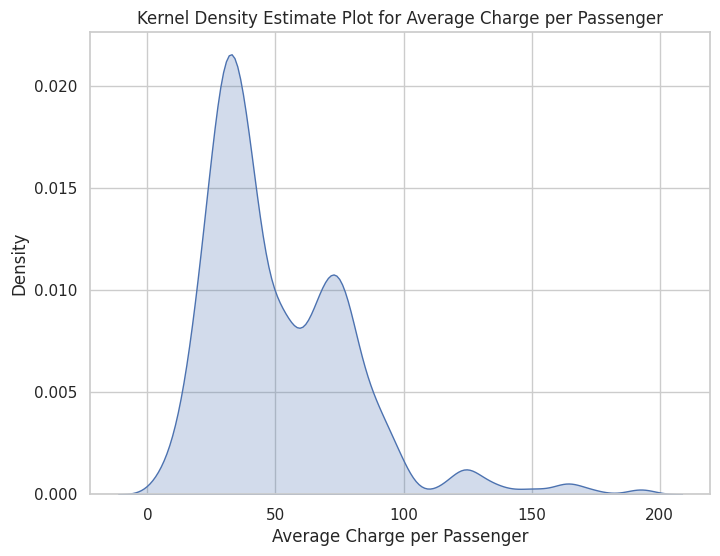

In [ ]:
# Kernel density plot to see the data distribution

sns.set(style="whitegrid")  # Optional: Set the style for the plot

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Create a KDE plot for 'Average Per Passenger' variable
sns.kdeplot(data=merged_df['Average Per Passenger'], fill=True)

# Add labels and a title
plt.xlabel('Average Charge per Passenger')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot for Average Charge per Passenger')

# Show the plot
plt.show()


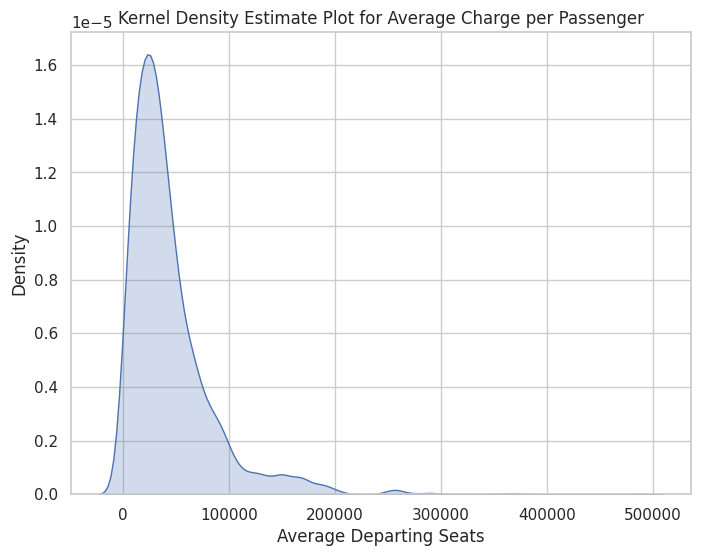

In [ ]:
sns.set(style="whitegrid")  # Optional: Set the style for the plot

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Create a KDE plot for 'Average Per Passenger' variable
sns.kdeplot(data=merged_df['departingseats_mean'], fill=True)

# Add labels and a title
plt.xlabel('Average Departing Seats')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot for Average Charge per Passenger')

# Show the plot
plt.show()

Data is skewed. I proceed to analyze deeper outliers with boxplot.

In [ ]:
fig = px.box(merged_df, x='year', y='Average Per Passenger', color='Equipment Name')
fig.update_layout(
    title='Average Per Passenger Charges per Flight over Years',
    xaxis_title='Year',
    yaxis_title=' Average Charges per Flight'
)
fig.show()


In [ ]:

fig = px.box(merged_df, x='year', y='departingseats_mean', color='Equipment Name')
fig.update_layout(
    title='Average Number of Seats per Flight over Years',
    xaxis_title='Year',
    yaxis_title=' Average Number of Seats per Flight'
)
fig.show()

If these data points are outliers will be analyzed further in next section.

In [ ]:
#Divide the data by medium and long-haul flights

a320_df = merged_df[merged_df['Equipment Name'] == 'A320']
a350_df = merged_df[merged_df['Equipment Name'] == 'A350-900']
print(a320_df.shape, a350_df.shape)

(2708, 42) (1771, 42)


In [ ]:
a320_df.describe()

,year,Passengers,Capacity,Load Factor,Air Navigation Charges,Infrastructure Charges,Government Charges,Passenger Security Charges,Passenger Charges,Aircraft Security Charges,Runway Charges,Parking Charges,Cargo Charges,Total,Average Per Passenger,departingseats_mean,departures_mean,totalco2tonnes_mean,co2perseatkg_mean,co2perdeparturetonnes_mean,income_percapita_destination_city_mean,destination_population_mean,income_percapita_origin_city_mean,pop_origin_mean
count,2708.000000,2708.000000,2708.000000,2708.0,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.0,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2.708000e+03,2708.000000,2.708000e+03
mean,2019.551329,122.720089,153.897341,80.0,137.321616,381.295127,1849.755053,214.350793,2112.386223,9.223262,628.361328,52.726081,0.0,5416.466908,44.160294,37186.900665,175.963072,7166.833008,185.068771,41.138405,16913.127770,1.266084e+07,37497.669867,7.502789e+06
std,1.801558,9.650253,12.025700,0.0,176.097154,536.458250,2426.094674,352.683315,1452.799239,53.248704,680.637167,101.993779,0.0,2765.822000,22.455871,36481.174646,153.899372,8663.424805,68.529190,25.343899,16469.854988,7.140772e+06,22085.221927,7.141528e+06
min,2017.000000,122.000000,153.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.132772,0.000000,0.0,576.536022,4.725705,126.000000,1.000000,20.216000,75.960251,13.623404,1820.000000,6.043680e+05,1820.000000,1.354290e+05
25%,2018.000000,122.000000,153.000000,80.0,0.000000,28.566300,0.000000,0.000000,1100.806000,0.000000,307.918758,0.000000,0.0,3564.776100,29.219476,14877.000000,83.750000,2358.833252,140.015503,25.322439,7260.000000,7.598189e+06,15030.000000,1.539830e+06
50%,2019.000000,122.000000,153.000000,80.0,51.782720,215.452764,915.000000,0.000000,2008.699500,0.000000,471.221520,0.000000,0.0,4615.544260,37.832330,27561.666667,128.777778,4539.643555,169.234581,32.487305,9050.000000,1.089970e+07,39830.000000,5.708844e+06
75%,2021.000000,122.000000,153.000000,80.0,232.605000,408.449600,2059.360000,302.560000,2879.200000,0.000000,691.140000,89.307124,0.0,7129.940660,56.619226,46172.000000,223.400000,8473.481445,208.935150,49.297783,21790.000000,1.600000e+07,55640.000000,1.055471e+07
max,2022.000000,252.000000,315.000000,80.0,922.655629,3353.472773,13520.554812,1809.260000,7693.759810,419.556100,5275.562070,728.920000,0.0,17109.925505,124.757483,486710.000000,1360.000000,145967.578125,876.255066,212.929977,81640.000000,3.206576e+07,84260.000000,2.939914e+07


In [ ]:
a350_df.describe()

,year,Passengers,Capacity,Load Factor,Air Navigation Charges,Infrastructure Charges,Government Charges,Passenger Security Charges,Passenger Charges,Aircraft Security Charges,Runway Charges,Parking Charges,Cargo Charges,Total,Average Per Passenger,departingseats_mean,departures_mean,totalco2tonnes_mean,co2perseatkg_mean,co2perdeparturetonnes_mean,income_percapita_destination_city_mean,destination_population_mean,income_percapita_origin_city_mean,pop_origin_mean
count,1771.000000,1771.0,1771.0,1771.0,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.0,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1.771000e+03,1771.000000,1.771000e+03
mean,2019.373800,252.0,315.0,80.0,375.604043,1181.293364,7586.047791,406.920149,4121.872872,11.669986,1764.015698,149.277059,0.0,15608.874241,61.939977,53942.294184,178.888199,29489.232422,532.277893,154.589432,49861.722191,1.221999e+07,43273.427442,7.170678e+06
std,1.870458,0.0,0.0,0.0,582.147191,1717.056409,7715.010208,749.102093,3041.157347,77.338929,1023.743163,281.853788,0.0,8510.788754,33.772971,44830.935743,137.746040,26843.554688,152.790878,54.536934,10841.590040,5.880642e+06,20419.915665,6.568366e+06
min,2017.000000,252.0,315.0,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.370719,0.000000,0.0,1528.517244,6.065545,174.000000,1.000000,36.528999,209.936783,36.528999,38270.000000,7.364140e+05,1820.000000,1.354290e+05
25%,2018.000000,252.0,315.0,80.0,0.000000,25.780000,199.962000,0.000000,1045.774800,0.000000,1011.379200,0.000000,0.0,8892.300800,35.286908,26546.000000,98.533333,12667.487305,420.952209,118.474953,39830.000000,9.000000e+06,30300.000000,2.800000e+06
50%,2019.000000,252.0,315.0,80.0,60.634695,366.080000,4394.232360,0.000000,3667.820800,0.000000,1640.095680,0.000000,0.0,14306.953800,56.773626,41459.200000,146.000000,20940.658203,501.121338,139.683014,43460.000000,1.200000e+07,43710.000000,5.434483e+06
75%,2021.000000,252.0,315.0,80.0,558.252000,1495.330704,13857.692256,488.880000,5700.240000,0.000000,2153.813624,206.810000,0.0,19694.148000,78.151381,67280.583333,224.000000,38970.898438,604.833252,180.024231,63490.000000,1.880472e+07,63490.000000,9.000000e+06
max,2022.000000,252.0,315.0,80.0,4456.327348,10492.542900,29239.880000,3737.160000,15892.028460,1804.910320,6271.553706,1275.144000,0.0,48537.506302,192.609152,367552.000000,1380.000000,242501.265625,1230.332275,416.371002,65970.000000,1.886653e+07,84260.000000,3.206576e+07


In [ ]:
# Count how many airports per continent

# Drop duplicate airports based on the "originairportcode" column
unique_airports = merged_df.drop_duplicates(subset='originairportcode')

# Count the number of airports by continent after removing duplicates
airport_counts = unique_airports['origincontinentname'].value_counts()

print(airport_counts)

Europe           31
North America    28
Asia             12
Middle East       9
South America     5
Africa            2
Name: origincontinentname, dtype: int64


Line plot of average charges per passenger by geographical area and type of flight (medium or long haul).

<ipython-input-42-2a5941855a2c>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



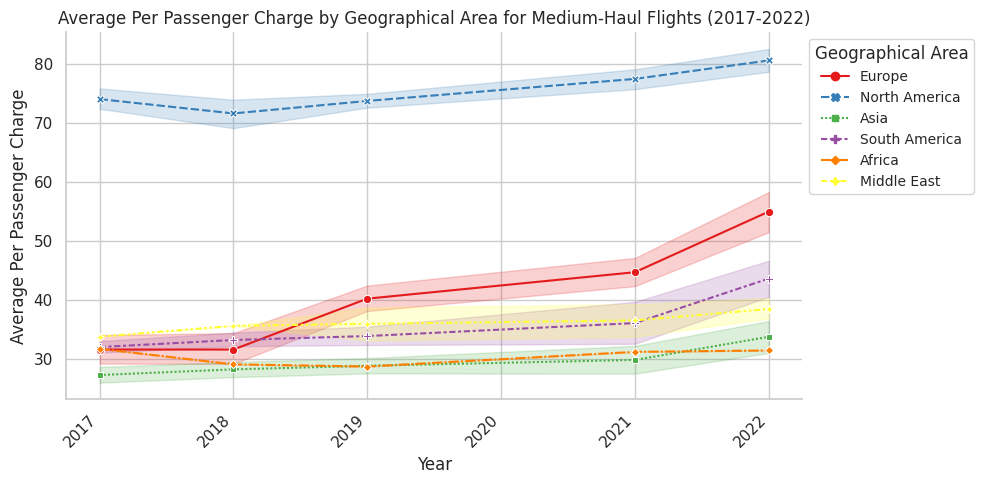

In [ ]:
# Set a custom color palette for the plot
custom_palette = sns.color_palette("Set1", len(a320_df['origincontinentname'].unique()))

# Create a figure with specified dimensions
plt.figure(figsize=(10, 5))

# Create a subplot
ax = plt.subplot(1, 1, 1)

# Plot the data with Seaborn
plot_a320 = sns.lineplot(data=a320_df, x="year", y='Average Per Passenger', hue="origincontinentname",
                        style="origincontinentname", markers=True, palette=custom_palette)

# Set a title and labels for the axes
plt.title('Average Per Passenger Charge by Geographical Area for Medium-Haul Flights (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Average Per Passenger Charge')

# Customize the legend
plt.legend(title='Geographical Area', bbox_to_anchor= (1,1), fontsize=10)

# Improve the appearance
sns.despine()
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette(custom_palette)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-43-8ab82864d2d4>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



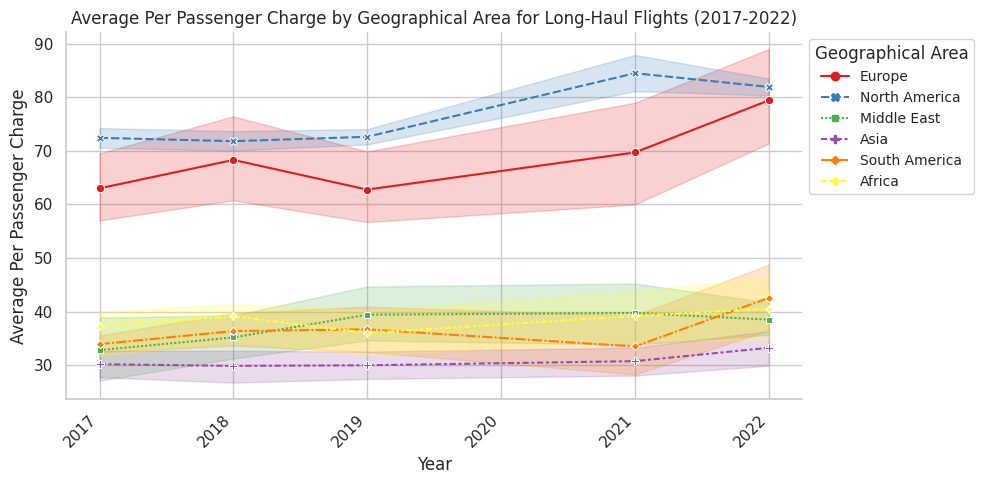

In [ ]:

# Set a custom color palette for the plot
custom_palette = sns.color_palette("Set1", len(a350_df['origincontinentname'].unique()))

# Create a figure with specified dimensions
plt.figure(figsize=(10, 5))

# Create a subplot
ax = plt.subplot(1, 1, 1)

# Plot the data with Seaborn
plot_a350 = sns.lineplot(data=a350_df, x="year", y='Average Per Passenger', hue="origincontinentname",
                        style="origincontinentname", markers=True, palette=custom_palette)

# Set a title and labels for the axes
plt.title('Average Per Passenger Charge by Geographical Area for Long-Haul Flights (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Average Per Passenger Charge')

# Customize the legend
plt.legend(title='Geographical Area', bbox_to_anchor= (1,1), fontsize=10)

# Improve the appearance
sns.despine()
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette(custom_palette)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Display the plot
plt.tight_layout()
plt.show()


Line plot of average number of departing seats by geographical area and type of flight (medium or long haul).

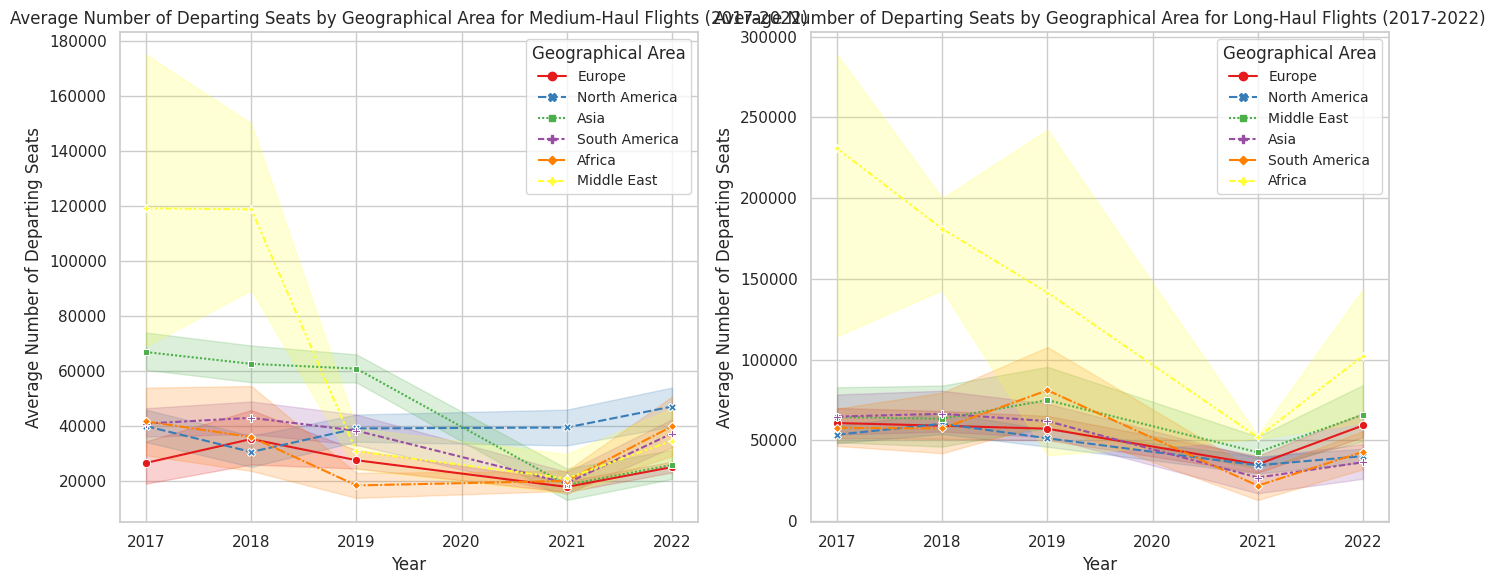

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_a320 = sns.lineplot(a320_df, x="year", y = 'departingseats_mean', hue="origincontinentname", style="origincontinentname", markers=True).set(title= 'Average Number of Departing Seats by Geographical Area for Medium-Haul Flights (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Average Number of Departing Seats')
plt.legend(title='Geographical Area', bbox_to_anchor= (1,1), fontsize=10)

plt.subplot(1, 2, 2)
plot_a350 = sns.lineplot(a350_df, x="year", y = 'departingseats_mean', hue="origincontinentname", style="origincontinentname", markers=True).set(title= 'Average Number of Departing Seats by Geographical Area for Long-Haul Flights (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Average Number of Departing Seats')
plt.legend(title='Geographical Area', bbox_to_anchor= (1,1), fontsize=10)

plt.tight_layout()
plt.show()

Line plot of average income per capita by geographical area.

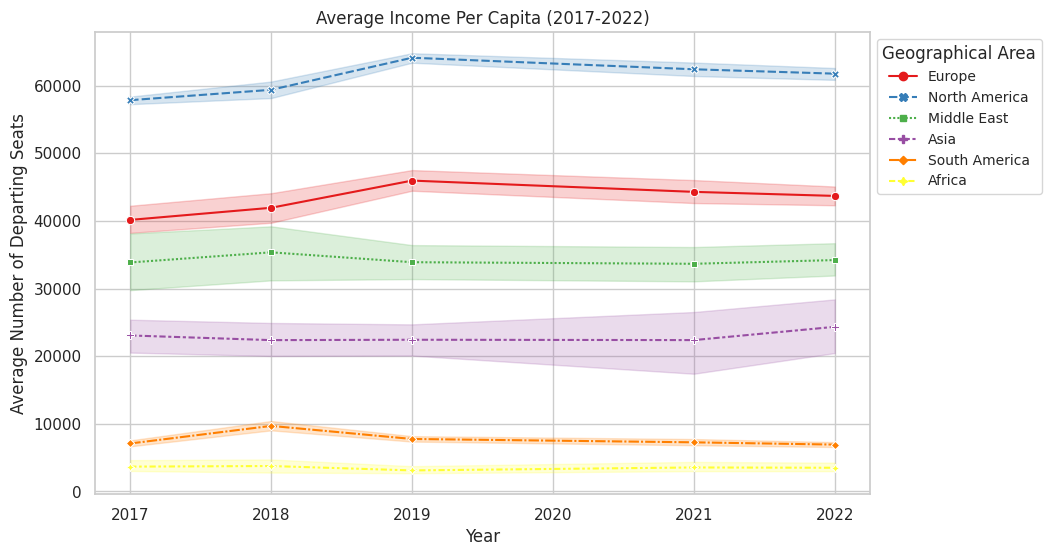

In [ ]:
plt.figure(figsize=(10, 6))

plot_a320 = sns.lineplot(merged_df, x="year", y = 'income_percapita_origin_city_mean', hue="origincontinentname", style="origincontinentname", markers=True).set(title= 'Average Income Per Capita (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Average Number of Departing Seats')
plt.legend(title='Geographical Area', bbox_to_anchor= (1,1), fontsize=10)

In [ ]:
# Count the number of airports

total_airports = merged_df['originairportname'].unique()
print(total_airports), print(len(total_airports))

['Amsterdam - Schiphol ' 'Stockholm - Arlanda '
 'Athens - Eleftherios Venizelos International '
 'Hartsfield-Jackson Atlanta International ' 'Abu Dhabi International '
 'Barcelona ' 'Bangkok - Suvarnabhumi International ' 'Bogota - Eldorado '
 'Mumbai ' 'Boston - Logan International ' 'Brussels - National '
 'Cairo International ' 'Guangzhou - Baiyun ' 'Paris - Charles De Gaulle '
 'Charlotte - Douglas ' 'Copenhagen '
 'Delhi - Indira Gandhi International ' 'Denver International '
 'Dallas/Ft. Worth International ' 'Hamad International '
 'Detroit - Wayne County ' 'Dublin ' 'Dusseldorf ' 'Dubai '
 'New York - Newark Liberty International ' 'Rome - Fiumicino '
 'Fort Lauderdale-Hollywood International ' 'Frankfurt International '
 'Sao Paulo - Guarulhos International ' 'Geneva - Cointrin ' 'Hamburg '
 'Helsinki-Vantaa ' 'Hong Kong International '
 'Washington - Dulles International '
 'Houston - George Bush Intercontinental '
 'Seoul - Incheon International ' 'Jeddah - King Abdulaziz I

(None, None)

From the plot we can observe that the quantity of charges divides the countries roughly in two groups:


1.   Western countries (Europe and North america)
2.   The rest of the world (Asia, Middle East, South America, Africa)

This requires the calculation of a different elasticity for each group.



## **4. CHECKING ASSUMPTIONS**

In [ ]:
#Subset the dataframe with columns necessary for elasticity

subset_a320_df = a320_df.loc[:, ['year', 'origincountryname', 'departingseats_mean', 'Average Per Passenger', 'income_percapita_origin_city_mean',	'pop_origin_mean', 'income_percapita_destination_city_mean',	'destination_population_mean', 'origincontinentname']]

#Subset the dataframe with columns necessary for elasticity

subset_a350_df = a350_df.loc[:, ['year', 'origincountryname', 'departingseats_mean', 'Average Per Passenger', 'income_percapita_origin_city_mean',	'pop_origin_mean', 'income_percapita_destination_city_mean',	'destination_population_mean', 'origincontinentname']]

In [ ]:
subset_a320_df.shape, subset_a350_df.shape

((2708, 9), (1771, 9))

<ipython-input-49-c68aa8f60db3>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-49-c68aa8f60db3>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



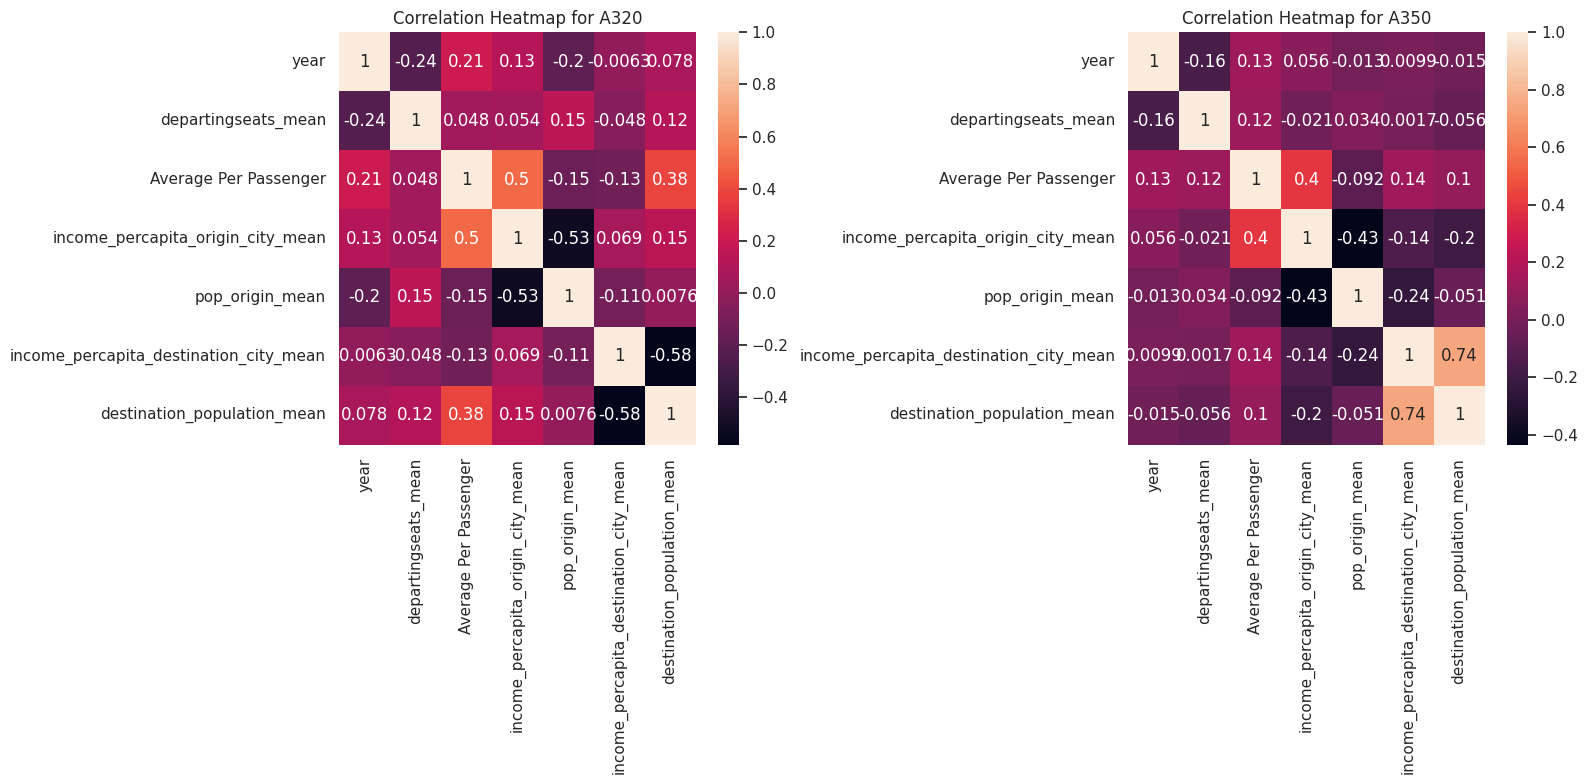

In [ ]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the correlation heatmap for subset_a320_df
sns.heatmap(subset_a320_df.corr(), annot=True, ax=axes[0])
axes[0].set_title('Correlation Heatmap for A320')

# Plot the correlation heatmap for subset_a350_df
sns.heatmap(subset_a350_df.corr(), annot=True, ax=axes[1])
axes[1].set_title('Correlation Heatmap for A350')

# Add some space between the subplots
plt.tight_layout()

# Display the plot
plt.show()


The correlation maps suggest that there's some correlation among some explanantory variable. I verify it with the Variance Inflation Fator.

### Variance Inflation Factor

In [ ]:


def vif_values(X):
  vif_data = pd.DataFrame()
  vif_data["Variable"] = X.columns

  # calculating VIF for each feature
  vif_data["VIF value"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]

  print(vif_data)

In [ ]:
a320_predictors = a320_df[['Average Per Passenger', 'income_percapita_origin_city_mean', 'pop_origin_mean', 'income_percapita_destination_city_mean']]

In [ ]:
a350_predictors = a350_df[['Average Per Passenger', 'income_percapita_origin_city_mean', 'pop_origin_mean', 'income_percapita_destination_city_mean']]

In [ ]:
vif_a320 = vif_values(a320_predictors)
vif_a350 = vif_values(a350_predictors)
print(vif_a320)
print(vif_a350)

                                 Variable  VIF value
0                   Average Per Passenger   6.156137
1       income_percapita_origin_city_mean   5.581982
2                         pop_origin_mean   1.785754
3  income_percapita_destination_city_mean   1.840686
                                 Variable  VIF value
0                   Average Per Passenger   5.553800
1       income_percapita_origin_city_mean   5.630198
2                         pop_origin_mean   1.980544
3  income_percapita_destination_city_mean   6.438357
None
None


There's multicollinearity between the average income per capita in the area around the airport of departure and the average charge per passenger. Therefore I eliminate the income variable to solve the problem.

In [ ]:
a320_predictors_drop = a320_df[['Average Per Passenger', 'pop_origin_mean', 'income_percapita_destination_city_mean']]
a350_predictors_drop = a350_df[['Average Per Passenger', 'pop_origin_mean', 'income_percapita_destination_city_mean']]

In [ ]:
vif_a320 = vif_values(a320_predictors_drop)
vif_a350 = vif_values(a350_predictors_drop)
print(vif_a320)
print(vif_a350)

                                 Variable  VIF value
0                   Average Per Passenger   1.956203
1                         pop_origin_mean   1.607332
2  income_percapita_destination_city_mean   1.602534
                                 Variable  VIF value
0                   Average Per Passenger   4.181888
1                         pop_origin_mean   1.894792
2  income_percapita_destination_city_mean   4.886139
None
None


There's no multicollinearity anymore. However, very likely there's a problem of endogeneity between the number of departing seats and the average charge per passenger, therefore I add an instrumental variable to solve the issue.

## **5. INSTRUMENTAL VARIABLE: AIRPORT OWNERSHIP**

In [ ]:
# Assuming you have a DataFrame named 'df' with a column 'originairportcode'
# Create a dictionary to map airport codes to ownership types
ownership_mapping = {
    'AGP': 'ppp', 'ATH': 'ppp', 'BCN': 'ppp', 'CDG': 'ppp', 'DUS': 'ppp',
    'FRA': 'ppp', 'HAM': 'ppp', 'HKG': 'ppp', 'MAD': 'ppp', 'MXP': 'ppp',
    'ORY': 'ppp', 'PMI': 'ppp', 'VIE': 'ppp', 'ZRH': 'ppp',
    'BRU': 'private', 'CPH': 'private', 'FCO': 'private', 'GRU': 'private',
    'KIX': 'private', 'LHR': 'private', 'LIM': 'private', 'LIS': 'private',
    'NRT': 'private', 'LGW': 'private', 'STN': 'private',
    'AMS': 'public', 'ARN': 'public', 'AUH': 'public', 'BER': 'public',
    'BKK': 'public', 'BOG': 'public', 'BOM': 'public', 'CAI': 'public',
    'CAN': 'public', 'DEL': 'public', 'DOH': 'public', 'DUB': 'public',
    'DXB': 'public', 'GVA': 'public', 'HEL': 'public', 'ICN': 'public',
    'IST': 'public', 'JED': 'public', 'JNB': 'public','KUL': 'public', 'KWI': 'public',
    'MAN': 'public', 'MCT': 'public', 'MEX': 'public', 'MUC': 'public',
    'OSL': 'public', 'PEK': 'public', 'PRG': 'public', 'PVG': 'public',
    'RUH': 'public', 'SCL': 'public', 'SIN': 'public', 'TLV': 'public',
    'WAW': 'public', 'YUL': 'public', 'YVR': 'public', 'YYC': 'public',
    'YYZ': 'public',
    'ATL': 'US', 'BOS': 'US', 'CLT': 'US', 'DEN': 'US',
    'DFW': 'US', 'DTW': 'US', 'EWR': 'US', 'FLL': 'US',
    'IAD': 'US', 'IAH': 'US', 'JFK': 'US', 'LAS': 'US', 'LAX': 'US',
    'MCO': 'US', 'MIA': 'US', 'MSP': 'US', 'ORD': 'US',
    'PDX': 'US', 'PHL': 'US', 'SAN': 'US', 'SEA': 'US',
    'SFO': 'US', 'SLC': 'US', 'TPA': 'US'
}

# Add the 'airport_ownership' column based on the mapping
merged_df['airport_ownership'] = merged_df['originairportcode'].map(ownership_mapping)

# Print the updated DataFrame
merged_df.head()


,year,originairportcode,originairportname,origincitycode,origincityname,origincountrycode,origincountryname,origincontinentcode,origincontinentname,destinationairportcode,destinationairportname_x,destinationcitycode,destinationcityname,destinationcountrycode_x,destinationcountryname_x,destinationcontinentcode,destinationcontinentname,Equipment Name,Passengers,Capacity,Load Factor,Air Navigation Charges,Infrastructure Charges,Government Charges,Passenger Security Charges,Passenger Charges,Aircraft Security Charges,Runway Charges,Parking Charges,Cargo Charges,Total,Average Per Passenger,primaryairlinename,departingseats_mean,departures_mean,totalco2tonnes_mean,co2perseatkg_mean,co2perdeparturetonnes_mean,income_percapita_destination_city_mean,destination_population_mean,income_percapita_origin_city_mean,pop_origin_mean,airport_ownership
0,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.65,0.0,0.0,2540.16,3008.88,0.0,1999.28,0.0,0.0,7671.114,30.440929,Delta Air Lines,79929.500000,322.500000,35121.332031,433.282501,111.506111,59240.0,18761941.0,47110.0,2800000.0,public
1,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.65,0.0,0.0,2540.16,3008.88,0.0,1999.28,0.0,0.0,7671.114,30.440929,Delta Air Lines,79929.500000,322.500000,35121.332031,433.282501,111.506111,59240.0,18761941.0,47110.0,2800000.0,public
2,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.65,0.0,0.0,2540.16,3008.88,0.0,1999.28,0.0,0.0,7671.114,30.440929,KLM,35872.666667,119.166667,17896.404297,472.479706,152.341751,59240.0,18761941.0,47110.0,2800000.0,public
3,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.65,0.0,0.0,2540.16,3008.88,0.0,1999.28,0.0,0.0,7671.114,30.440929,KLM,35872.666667,119.166667,17896.404297,472.479706,152.341751,59240.0,18761941.0,47110.0,2800000.0,public
4,2017,AMS,Amsterdam - Schiphol,AMS,Amsterdam,NL,Netherlands,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,522.65,0.0,0.0,2540.16,3008.88,0.0,1999.28,0.0,0.0,7671.114,30.440929,KLM,35872.666667,119.166667,17896.404297,472.479706,152.341751,59240.0,18761941.0,47110.0,2800000.0,public


In [ ]:
# Group the DataFrame by 'airport_ownership' and count the unique 'originairportname'
ownership_counts = merged_df[merged_df['airport_ownership'].isin(['private', 'public', 'ppp', 'US'])] \
    .groupby('airport_ownership')['originairportname'] \
    .nunique()

# Display the ownership counts
print(ownership_counts)


airport_ownership
US         24
ppp        14
private    11
public     38
Name: originairportname, dtype: int64


In [ ]:
#transform  from qualitative to dummy variables

merged_df = pd.get_dummies(merged_df, columns=['airport_ownership'], prefix=['airport_ownership'])

In [ ]:
med_df = merged_df[merged_df['Equipment Name'] == 'A320']

long_df = merged_df[merged_df['Equipment Name'] == 'A350-900']

In [ ]:
west_med_df = med_df[(med_df['origincontinentname'] == 'Europe') | (med_df['origincontinentname'] == 'North America')]
west_long_df = long_df[(long_df['origincontinentname'] == 'Europe') | (long_df['origincontinentname'] == 'North America')]

rest_med_df = med_df[(med_df['origincontinentname'] == 'Asia') |
                             (med_df['origincontinentname'] == 'Middle East') |
                             (med_df['origincontinentname'] == 'South America') |
                             (med_df['origincontinentname'] == 'Africa')]

rest_long_df = long_df[(long_df['origincontinentname'] == 'Asia') |
                             (long_df['origincontinentname'] == 'Middle East') |
                             (long_df['origincontinentname'] == 'South America') |
                             (long_df['origincontinentname'] == 'Africa')]


### Outliers detection

In [ ]:
#boxplot for medium-haul flights departing from western countries
fig = px.box(west_med_df, x='year', y='Average Per Passenger')
fig.update_layout(
    title='Average Per Passenger Charges per Flight over Years',
    xaxis_title='Year',
    yaxis_title=' Average Charges per Flight'
)
fig.show()


In [ ]:
fig = px.box(west_med_df, x='year', y='departingseats_mean')
fig.update_layout(
    title='Departing Seats per Flight over Years',
    xaxis_title='Year',
    yaxis_title='Departing seats per Flight'
)
fig.show()


In [ ]:
# Calculate quartiles and IQR
Q1 = west_med_df['departingseats_mean'].quantile(0.25)
Q3 = west_med_df['departingseats_mean'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Extract outliers
outlier = west_med_df[(west_med_df['departingseats_mean'] < lower_bound) | (west_med_df['departingseats_mean'] > upper_bound)]

print("Outliers:")
outlier.shape

Outliers:


(25, 46)

In [ ]:
outlier.head(25)

,year,originairportcode,originairportname,origincitycode,origincityname,origincountrycode,origincountryname,origincontinentcode,origincontinentname,destinationairportcode,destinationairportname_x,destinationcitycode,destinationcityname,destinationcountrycode_x,destinationcountryname_x,destinationcontinentcode,destinationcontinentname,Equipment Name,Passengers,Capacity,Load Factor,Air Navigation Charges,Infrastructure Charges,Government Charges,Passenger Security Charges,Passenger Charges,Aircraft Security Charges,Runway Charges,Parking Charges,Cargo Charges,Total,Average Per Passenger,primaryairlinename,departingseats_mean,departures_mean,totalco2tonnes_mean,co2perseatkg_mean,co2perdeparturetonnes_mean,income_percapita_destination_city_mean,destination_population_mean,income_percapita_origin_city_mean,pop_origin_mean,airport_ownership_US,airport_ownership_ppp,airport_ownership_private,airport_ownership_public
182,2017,DFW,Dallas/Ft. Worth International,DFW,Dallas,US,United States,NA,North America,MEX,Mexico City - Juarez International,MEX,Mexico City,MX,Mexico,NA,North America,A320,122,153,80,0.000000,1479.8226,6651.302032,737.253808,499.6449,0.0,309.943656,0.0000,0.0,9677.966996,79.327598,American Airlines,128528.000000,903.000000,14363.327148,111.819794,15.950348,8920.0,21500251.0,59240.0,5970969.0,1,0,0,0
183,2017,DFW,Dallas/Ft. Worth International,DFW,Dallas,US,United States,NA,North America,MEX,Mexico City - Juarez International,MEX,Mexico City,MX,Mexico,NA,North America,A320,122,153,80,0.000000,1479.8226,6651.302032,737.253808,499.6449,0.0,309.943656,0.0000,0.0,9677.966996,79.327598,American Airlines,128528.000000,903.000000,14363.327148,111.819794,15.950348,8920.0,21500251.0,59240.0,5970969.0,1,0,0,0
376,2017,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,MEX,Mexico City - Juarez International,MEX,Mexico City,MX,Mexico,NA,North America,A320,122,153,80,0.000000,0.0000,6651.302032,0.000000,499.6449,0.0,945.320870,63.7070,0.0,8159.974802,66.885039,Interjet,165450.000000,1103.000000,40285.972656,243.493332,36.523998,8920.0,21500251.0,59240.0,18761941.0,1,0,0,0
437,2017,LAX,Los Angeles International,LAX,Los Angeles,US,United States,NA,North America,MEX,Mexico City - Juarez International,MEX,Mexico City,MX,Mexico,NA,North America,A320,122,153,80,0.000000,1165.8381,6651.302032,0.000000,499.6449,0.0,585.649350,0.0000,0.0,8902.434382,72.970774,Volaris,135067.000000,748.000000,20632.376953,152.756607,27.583391,8920.0,21500251.0,59240.0,12420136.0,1,0,0,0
556,2017,MUC,Munich - Franz Josef Strauss,MUC,Munich,DE,Germany,EU,Europe,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A320,122,153,80,176.296500,3.6600,3721.000000,0.000000,2602.2600,0.0,408.100000,0.0000,0.0,7227.608500,59.242693,Emirates,175324.666667,365.000000,65150.855469,376.369537,141.868546,39280.0,1343353.0,43710.0,135429.0,0,0,0,1
557,2017,MUC,Munich - Franz Josef Strauss,MUC,Munich,DE,Germany,EU,Europe,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A320,122,153,80,176.296500,3.6600,3721.000000,0.000000,2602.2600,0.0,408.100000,0.0000,0.0,7227.608500,59.242693,Emirates,175324.666667,365.000000,65150.855469,376.369537,141.868546,39280.0,1343353.0,43710.0,135429.0,0,0,0,1
558,2017,MUC,Munich - Franz Josef Strauss,MUC,Munich,DE,Germany,EU,Europe,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A320,122,153,80,176.296500,3.6600,3721.000000,0.000000,2602.2600,0.0,408.100000,0.0000,0.0,7227.608500,59.242693,Emirates,175324.666667,365.000000,65150.855469,376.369537,141.868546,39280.0,1343353.0,43710.0,135429.0,0,0,0,1
816,2017,ZRH,Zurich,ZRH,Zurich,CH,Switzerland,EU,Europe,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A320,122,153,80,456.590997,386.9815,0.000000,1601.860000,2710.8400,0.0,613.575000,219.6750,0.0,5989.522497,49.094447,Emirates,188734.000000,365.500000,74469.750000,345.394867,165.292557,39280.0,1343353.0,81880.0,1500000.0,0,1,0,0
817,2017,ZRH,Zurich,ZRH,Zurich,CH,Switze

After going through the outliers I decide to only drop one observation which is very likely an extreme value. The average number of departing flights from Zurich to Dubai in 2019 is 369600, which is 181393 seats more than the second largest outlier. For this reason it seems definitely a mistake and I remove it.

In [ ]:
west_med_df = west_med_df.drop(2757, axis = 0)

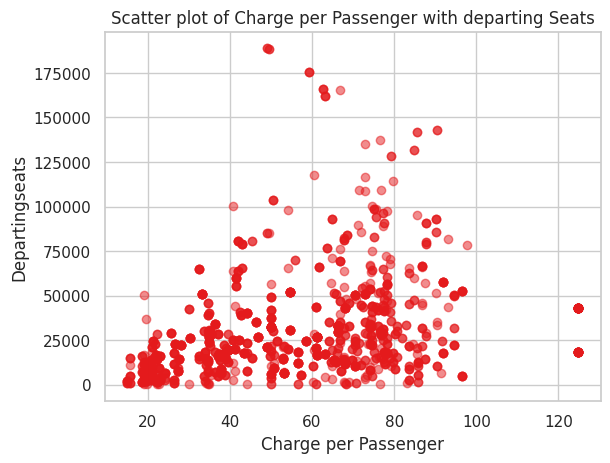

In [ ]:
plt.scatter(west_med_df['Average Per Passenger'], west_med_df['departingseats_mean'], alpha=0.5)
plt.title('Scatter plot of Charge per Passenger with departing Seats')
plt.xlabel('Charge per Passenger')
plt.ylabel('Departingseats')
plt.show()

In [ ]:
#boxplot for long-haul flights departing from western countries
fig = px.box(west_long_df, x='year', y='Average Per Passenger')
fig.update_layout(
    title='Average Per Passenger Charges per Flight over Years',
    xaxis_title='Year',
    yaxis_title=' Average Charges per Flight'
)
fig.show()

In [ ]:

fig = px.box(west_long_df, x='year', y='departingseats_mean')
fig.update_layout(
    title='Departing Seats per Flight over Years',
    xaxis_title='Year',
    yaxis_title='Departing seats per Flight'
)
fig.show()


In [ ]:

# Calculate quartiles and IQR
Q1 = west_long_df['departingseats_mean'].quantile(0.25)
Q3 = west_long_df['departingseats_mean'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Extract outliers
outlier_long = west_long_df[(west_long_df['departingseats_mean'] < lower_bound) | (west_long_df['departingseats_mean'] > upper_bound)]

print("Outliers:")
outlier_long.shape

Outliers:


(31, 46)

In [ ]:
outlier_long.head(31)

,year,originairportcode,originairportname,origincitycode,origincityname,origincountrycode,origincountryname,origincontinentcode,origincontinentname,destinationairportcode,destinationairportname_x,destinationcitycode,destinationcityname,destinationcountrycode_x,destinationcountryname_x,destinationcontinentcode,destinationcontinentname,Equipment Name,Passengers,Capacity,Load Factor,Air Navigation Charges,Infrastructure Charges,Government Charges,Passenger Security Charges,Passenger Charges,Aircraft Security Charges,Runway Charges,Parking Charges,Cargo Charges,Total,Average Per Passenger,primaryairlinename,departingseats_mean,departures_mean,totalco2tonnes_mean,co2perseatkg_mean,co2perdeparturetonnes_mean,income_percapita_destination_city_mean,destination_population_mean,income_percapita_origin_city_mean,pop_origin_mean,airport_ownership_US,airport_ownership_ppp,airport_ownership_private,airport_ownership_public
424,2017,LAS,Las Vegas - Harry Reid International,LAS,Las Vegas,US,United States,NA,North America,LHR,London - Heathrow,LON,London,GB,"United Kingdom, UK",EU,Europe,A350-900,252,315,80,0.000000,865.286676,13520.554812,0.00,2866.815000,0.0,793.934836,91.0100,0.0,18137.601324,71.974608,British Airways,183328.000000,544.000000,168218.406250,917.581604,309.225006,41880.0,8800000.0,59240.0,2450770.0,1,0,0,0
452,2017,LHR,London - Heathrow,LON,London,GB,"United Kingdom, UK",EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,49.389588,0.000000,24577.500000,0.00,11807.089308,0.0,1388.047433,118.3562,0.0,37940.382529,150.557074,American Airlines,190345.000000,697.000000,93663.343750,481.792908,136.677368,59240.0,18761941.0,41880.0,8800000.0,0,0,1,0
453,2017,LHR,London - Heathrow,LON,London,GB,"United Kingdom, UK",EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,49.389588,0.000000,24577.500000,0.00,11807.089308,0.0,1388.047433,118.3562,0.0,37940.382529,150.557074,American Airlines,190345.000000,697.000000,93663.343750,481.792908,136.677368,59240.0,18761941.0,41880.0,8800000.0,0,0,1,0
459,2017,LHR,London - Heathrow,LON,London,GB,"United Kingdom, UK",EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,49.389588,0.000000,24577.500000,0.00,11807.089308,0.0,1388.047433,118.3562,0.0,37940.382529,150.557074,British Airways,367552.000000,1380.000000,242501.265625,640.064453,165.688904,59240.0,18761941.0,41880.0,8800000.0,0,0,1,0
460,2017,LHR,London - Heathrow,LON,London,GB,"United Kingdom, UK",EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,49.389588,0.000000,24577.500000,0.00,11807.089308,0.0,1388.047433,118.3562,0.0,37940.382529,150.557074,British Airways,367552.000000,1380.000000,242501.265625,640.064453,165.688904,59240.0,18761941.0,41880.0,8800000.0,0,0,1,0
574,2017,MXP,Milan - Malpensa,MIL,Milan,IT,Italy,EU,Europe,JFK,New York - John F. Kennedy International,NYC,New York,US,United States,NA,North America,A350-900,252,315,80,680.238000,351.720000,1638.000000,753.48,4732.560000,0.0,2264.940000,0.0000,0.0,10420.938000,41.352929,Emirates,188524.000000,365.000000,101173.851562,536.662964,277.188629,59240.0,18761941.0,31340.0,3200000.0,0,1,0,0
1027,2018,DUS,Dusseldorf,DUS,Dusseldorf,DE,Germany,EU,Europe,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A350-900,252,315,80,414.298800,183.552000,7189.560000,221.76,4183.200000,0.0,631.004000,0.0000,0.0,12925.374800,51.291170,Emirates,182093.000000,365.000000,74114.476562,389.454529,173.740936,41470.0,1419699.0,47410.0,617280.0,0,1,0,0
1028,2018,DUS,Dusseldorf,DUS,Dusseldorf,DE,Germany,EU,Europe,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A350-900,252,315,80,414.298800,183.552000,7189.560000,221.76,4183.200000,0.0,631.004000,0.0000,0.0,12925.374800,51.291170,Emirates,182093.000000,365.000

As before, after going through the outliers, I decide to only drop one observation which is very likely an extreme value. The average number of departing flights from London Heathrow to New York - J.F. Kennedy International in 2017 is 367552, which is still extremely higher compared to the other extreme values and it seems definitely a mistake .

In [ ]:
west_long_df = west_long_df.drop([459, 460])

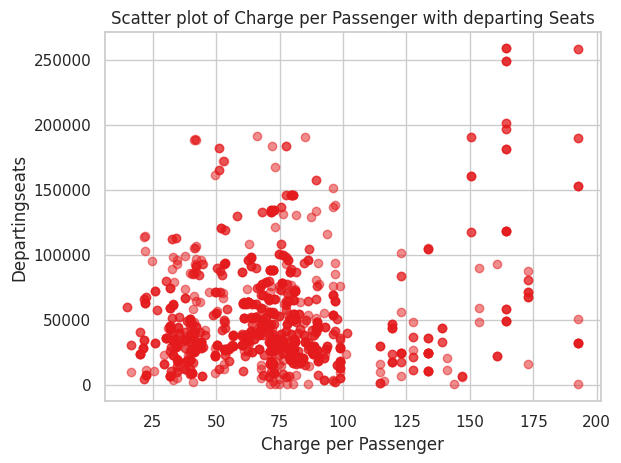

In [ ]:
plt.scatter(west_long_df['Average Per Passenger'], west_long_df['departingseats_mean'], alpha=0.5)
plt.title('Scatter plot of Charge per Passenger with departing Seats')
plt.xlabel('Charge per Passenger')
plt.ylabel('Departingseats')
plt.show()

In [ ]:
#boxplot of medium-haul flights for the other countries
fig = px.box(rest_med_df, x='year', y='Average Per Passenger')
fig.update_layout(
    title='Average Per Passenger Charges per Flight over Years',
    xaxis_title='Year',
    yaxis_title=' Average Charges per Flight'
)
fig.show()

In [ ]:
fig = px.box(rest_med_df, x='year', y='departingseats_mean')
fig.update_layout(
    title='Departing Seats per Flight over Years',
    xaxis_title='Year',
    yaxis_title='Departing seats per Flight'
)
fig.show()

In [ ]:

# Calculate quartiles and IQR
Q1 = rest_med_df['departingseats_mean'].quantile(0.25)
Q3 = rest_med_df['departingseats_mean'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Extract outliers
outlier_rest = rest_med_df[(rest_med_df['departingseats_mean'] < lower_bound) | (rest_med_df['departingseats_mean'] > upper_bound)]

print("Outliers:")
outlier_rest.shape

Outliers:


(12, 46)

In [ ]:
outlier_rest.head(12)

,year,originairportcode,originairportname,origincitycode,origincityname,origincountrycode,origincountryname,origincontinentcode,origincontinentname,destinationairportcode,destinationairportname_x,destinationcitycode,destinationcityname,destinationcountrycode_x,destinationcountryname_x,destinationcontinentcode,destinationcontinentname,Equipment Name,Passengers,Capacity,Load Factor,Air Navigation Charges,Infrastructure Charges,Government Charges,Passenger Security Charges,Passenger Charges,Aircraft Security Charges,Runway Charges,Parking Charges,Cargo Charges,Total,Average Per Passenger,primaryairlinename,departingseats_mean,departures_mean,totalco2tonnes_mean,co2perseatkg_mean,co2perdeparturetonnes_mean,income_percapita_destination_city_mean,destination_population_mean,income_percapita_origin_city_mean,pop_origin_mean,airport_ownership_US,airport_ownership_ppp,airport_ownership_private,airport_ownership_public
218,2017,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,DEL,Delhi - Indira Gandhi International,DEL,Delhi,IN,India,AS,Asia,A320,122,153,80,0.00000,135.051000,0.0000,151.1580,3476.6340,0.0,307.918758,60.4632,0.0,4131.224958,33.862500,IndiGo,199260.0,1107.0,27200.597656,136.508072,24.571451,1820.0,27602257.0,39280.0,1343353.0,0,0,0,1
223,2017,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,DEL,Delhi - Indira Gandhi International,DEL,Delhi,IN,India,AS,Asia,A320,122,153,80,0.00000,135.051000,0.0000,151.1580,3476.6340,0.0,307.918758,60.4632,0.0,4131.224958,33.862500,Emirates,260163.0,730.5,43323.429688,165.221436,59.306076,1820.0,27602257.0,39280.0,1343353.0,0,0,0,1
224,2017,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,DEL,Delhi - Indira Gandhi International,DEL,Delhi,IN,India,AS,Asia,A320,122,153,80,0.00000,135.051000,0.0000,151.1580,3476.6340,0.0,307.918758,60.4632,0.0,4131.224958,33.862500,Emirates,260163.0,730.5,43323.429688,165.221436,59.306076,1820.0,27602257.0,39280.0,1343353.0,0,0,0,1
298,2017,HKG,Hong Kong International,HKG,Hong Kong,HK,Hong Kong,AS,Asia,BKK,Bangkok - Suvarnabhumi International,BKK,Bangkok,TH,Thailand,AS,Asia,A320,122,153,80,0.00000,0.000000,1696.7760,636.2910,1719.4924,0.0,767.142100,152.9880,0.0,4972.689500,40.759750,Emirates,188524.0,365.0,28908.925781,153.343475,79.202538,5970.0,9898653.0,46390.0,7364883.0,0,1,0,0
1038,2018,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,DEL,Delhi - Indira Gandhi International,DEL,Delhi,IN,India,AS,Asia,A320,122,153,80,0.00000,140.364900,0.0000,153.1710,3676.1040,0.0,319.824815,62.7750,0.0,4352.239715,35.674096,IndiGo,202680.0,1126.0,27666.074219,136.501251,24.570225,2010.0,28513682.0,41470.0,1419699.0,0,0,0,1
1102,2018,HKG,Hong Kong International,HKG,Hong Kong,HK,Hong Kong,AS,Asia,BKK,Bangkok - Suvarnabhumi International,BKK,Bangkok,TH,Thailand,AS,Asia,A320,122,153,80,0.00000,0.000000,1724.5920,646.7220,1747.6808,0.0,836.851200,155.4960,0.0,5111.342000,41.896246,Emirates,188901.0,365.0,28905.662109,153.020157,79.193596,6610.0,10156316.0,50060.0,7428887.0,0,1,0,0
1950,2019,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,DEL,Delhi - Indira Gandhi International,DEL,Delhi,IN,India,AS,Asia,A320,122,153,80,0.00000,142.732800,0.0000,151.1580,3627.7920,0.0,325.401048,63.9324,0.0,4311.016248,35.336199,Emirates,256697.0,730.0,43193.582031,185.589264,56.746227,2120.0,29399141.0,43830.0,1452057.0,0,0,0,1
1951,2019,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,DEL,Delhi - Indira Gandhi International,DEL,Delhi,IN,India,AS,Asia,A320,122,153,80,0.00000,142.732800,0.0000,151.1580,3627.7920,0.0,325.401048,63.9324,0.0,4311.016248,35.336199,Emirates,256697.0,730.0,43193.582031,185.589264,56.746227,2120.0,29399141.0,43830.0,1452057.0,0,0,0,1
2150,2019,ICN,Seoul - Incheon International,SEL,Seoul,KR,Republic of Korea,AS,Asia,BKK,Bangkok - Suvarnabhumi International,BKK,Bangkok,TH,Thailand,AS,Asia,A320,122,153,80,51.78272,247.934562,924.1012,0.0000,1428.1564,0.0,455.990920,0.0000,0.0,3107.965802,25.475130,Jeju Air,1

In thi case I decide to eliminate 2 observations in 2021 and 2022 for flights departing from Dubai and landing in Delhi that had too extreme values even compared with the other outliers.

In [ ]:
rest_med_df = rest_med_df.drop([3002, 3810])

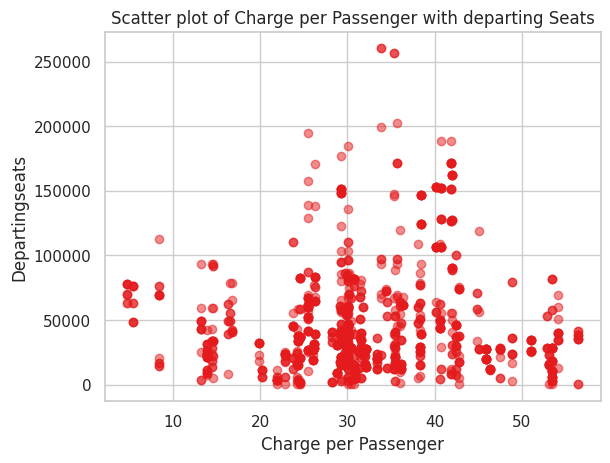

In [ ]:
plt.scatter(rest_med_df['Average Per Passenger'], rest_med_df['departingseats_mean'], alpha=0.5)
plt.title('Scatter plot of Charge per Passenger with departing Seats')
plt.xlabel('Charge per Passenger')
plt.ylabel('Departingseats')
plt.show()

In [ ]:
# boxplot for long-haul flights in other countries
fig = px.box(rest_long_df, x='year', y='Average Per Passenger')
fig.update_layout(
    title='Average Per Passenger Charges per Flight over Years',
    xaxis_title='Year',
    yaxis_title=' Average Charges per Flight'
)
fig.show()

In [ ]:
fig = px.box(rest_long_df, x='year', y='departingseats_mean')
fig.update_layout(
    title='Departing Seats per Flight over Years',
    xaxis_title='Year',
    yaxis_title='Departing seats per Flight'
)
fig.show()

In [ ]:

# Calculate quartiles and IQR
Q1 = rest_long_df['departingseats_mean'].quantile(0.25)
Q3 = rest_long_df['departingseats_mean'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Extract outliers
outlier_restlong = rest_long_df[(rest_long_df['departingseats_mean'] < lower_bound) | (rest_long_df['departingseats_mean'] > upper_bound)]

print("Outliers:")
outlier_restlong.shape

Outliers:


(10, 46)

In [ ]:
outlier_restlong.head(10)

,year,originairportcode,originairportname,origincitycode,origincityname,origincountrycode,origincountryname,origincontinentcode,origincontinentname,destinationairportcode,destinationairportname_x,destinationcitycode,destinationcityname,destinationcountrycode_x,destinationcountryname_x,destinationcontinentcode,destinationcontinentname,Equipment Name,Passengers,Capacity,Load Factor,Air Navigation Charges,Infrastructure Charges,Government Charges,Passenger Security Charges,Passenger Charges,Aircraft Security Charges,Runway Charges,Parking Charges,Cargo Charges,Total,Average Per Passenger,primaryairlinename,departingseats_mean,departures_mean,totalco2tonnes_mean,co2perseatkg_mean,co2perdeparturetonnes_mean,income_percapita_destination_city_mean,destination_population_mean,income_percapita_origin_city_mean,pop_origin_mean,airport_ownership_US,airport_ownership_ppp,airport_ownership_private,airport_ownership_public
396,2017,JNB,Johannesburg - O.R. Tambo International,JNB,Johannesburg,ZA,South Africa,AF,Africa,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A350-900,252,315,80,3608.033464,0.0000,2681.273650,0.0000,2470.601246,0.0,1309.603022,0.0,0.0,10069.511382,39.958378,Emirates,288831.5,731.0,145626.593750,512.908325,225.803619,39280.0,1343353.0,5910.0,4317505.0,0,0,0,1
397,2017,JNB,Johannesburg - O.R. Tambo International,JNB,Johannesburg,ZA,South Africa,AF,Africa,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A350-900,252,315,80,3608.033464,0.0000,2681.273650,0.0000,2470.601246,0.0,1309.603022,0.0,0.0,10069.511382,39.958378,Emirates,288831.5,731.0,145626.593750,512.908325,225.803619,39280.0,1343353.0,5910.0,4317505.0,0,0,0,1
410,2017,KUL,Kuala Lumpur International,KUL,Kuala Lumpur,MY,Malaysia,AS,Asia,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A350-900,252,315,80,0.000000,17.4845,0.000000,311.0184,3473.038800,0.0,739.162380,0.0,0.0,4540.704080,18.018667,Emirates,250534.5,548.5,111965.804688,438.322418,193.517914,39280.0,1343353.0,9950.0,7318545.0,0,0,0,1
411,2017,KUL,Kuala Lumpur International,KUL,Kuala Lumpur,MY,Malaysia,AS,Asia,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A350-900,252,315,80,0.000000,17.4845,0.000000,311.0184,3473.038800,0.0,739.162380,0.0,0.0,4540.704080,18.018667,Emirates,250534.5,548.5,111965.804688,438.322418,193.517914,39280.0,1343353.0,9950.0,7318545.0,0,0,0,1
1041,2018,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,CDG,Paris - Charles De Gaulle,PAR,Paris,FR,France,EU,Europe,A350-900,252,315,80,0.000000,140.3649,0.000000,316.3860,7593.264000,0.0,1158.646964,0.0,0.0,9208.661863,36.542309,Emirates,276001.5,533.0,119490.296875,380.109680,182.175323,41150.0,12000000.0,41470.0,1419699.0,0,0,0,1
1042,2018,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,CDG,Paris - Charles De Gaulle,PAR,Paris,FR,France,EU,Europe,A350-900,252,315,80,0.000000,140.3649,0.000000,316.3860,7593.264000,0.0,1158.646964,0.0,0.0,9208.661863,36.542309,Emirates,276001.5,533.0,119490.296875,380.109680,182.175323,41150.0,12000000.0,41470.0,1419699.0,0,0,0,1
1195,2018,KUL,Kuala Lumpur International,KUL,Kuala Lumpur,MY,Malaysia,AS,Asia,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A350-900,252,315,80,0.000000,16.9405,50.223600,301.3416,3364.981200,0.0,716.164620,0.0,0.0,4449.651520,17.657347,Emirates,258884.0,542.0,113756.187500,431.410980,193.511169,41470.0,1419699.0,10650.0,7563912.0,0,0,0,1
1196,2018,KUL,Kuala Lumpur International,KUL,Kuala Lumpur,MY,Malaysia,AS,Asia,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A350-900,252,315,80,0.000000,16.9405,50.223600,301.3416,3364.981200,0.0,716.164620,0.0,0.0,4449.651520,17.657347,Emirates,258884.0,542.0,113756.187500,431.410980,193.511169,41470.0,1419699.0,10650.0,7563912.0,0,0,0,1
2220,2019,JNB,Johannesburg - O.R. Tambo International,JNB,Johannesburg,ZA,South Africa,AF,Africa,DXB,Dubai,DXB,Dubai,AE,United Arab Emirates,ME,Middle East,A350-900,252,315,80,3956.572052,0.0000,2713.733366,0.0000,2614.71

I decide to drop all 10 observations as they have all very extreme values.

In [ ]:
rest_long_df = rest_long_df.drop([396, 397, 410, 411, 1041, 1042, 1195, 1196, 2220, 2221])

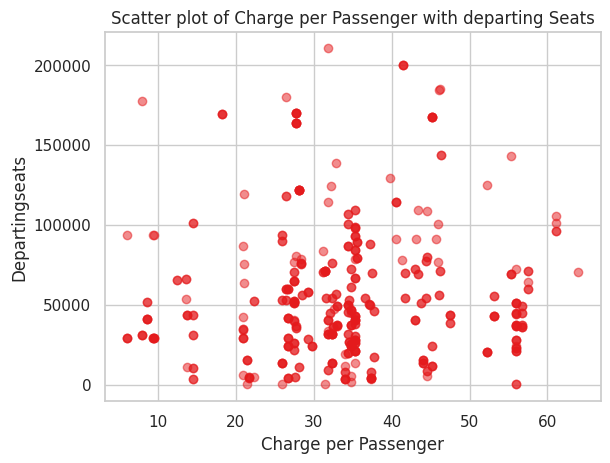

In [ ]:
plt.scatter(rest_long_df['Average Per Passenger'], rest_long_df['departingseats_mean'], alpha=0.5)
plt.title('Scatter plot of Charge per Passenger with departing Seats')
plt.xlabel('Charge per Passenger')
plt.ylabel('Departingseats')
plt.show()

## **6. SUPPLY ELASTICITY ESTIMATION**

In [ ]:
def supply_elasticity_robust(data, instr_variables):

  # Apply the natural logarithm transformation to the specified columns
  log_columns = ['departingseats_mean', 'Average Per Passenger', 'income_percapita_destination_city_mean', 'pop_origin_mean', 'destination_population_mean']

  data[log_columns] = np.log(data[log_columns])

  y = data.loc[:, ['departingseats_mean']]
  endog_variable= data.loc[:, ['Average Per Passenger']]
  exog_variable = data.loc[:, ['pop_origin_mean', 'income_percapita_destination_city_mean', 'destination_population_mean']]

  #define fixed effects
  year_fe = pd.get_dummies(data['year'], drop_first=True)
  country_fe = pd.get_dummies(data['origincountryname'], drop_first=True)

  Z = np.hstack((sm.add_constant(exog_variable),instr_variables, year_fe, country_fe))

  stage_1 = sm.RLM(endog_variable, Z).fit()

  stage_1_coeff = np.array(stage_1.fittedvalues)

  X_hat = np.hstack((sm.add_constant(exog_variable), stage_1_coeff.reshape(-1,1), year_fe, country_fe))

  year_cols = year_fe.columns
  country_cols = country_fe.columns

  fe_cols = year_cols.to_list() + country_cols.to_list()

  columns_names = ['Constant', 'Population in the Region around the Airport of Departure', 'Per Capita Income in the Region of the Destination Airport', 'Population in the Region around the Airport of Destination', 'Average Charge per Passenger' ]
  columns_names += fe_cols
  X_hat = pd.DataFrame(X_hat, columns = columns_names).reset_index(drop=True)

  y = pd.DataFrame(y).reset_index(drop=True)

  stage_2 = sm.RLM(y, X_hat).fit()

  return stage_1.summary(), stage_2.summary(), stage_2


In [ ]:
subset_west_med_df = west_med_df.loc[:, ['year', 'origincontinentname','departingseats_mean', 'Average Per Passenger',	'pop_origin_mean', 'income_percapita_destination_city_mean','destination_population_mean', 'totalco2tonnes_mean', 'origincountryname',  'airport_ownership_public', 'airport_ownership_private', 'airport_ownership_ppp', 'airport_ownership_US']]

instr_variables_west_med = subset_west_med_df.loc[:, ['airport_ownership_public',	'airport_ownership_private',	'airport_ownership_ppp',	'airport_ownership_US']]

stage_1_west_med_robust, stage_2_west_med_robust, stage_2_wm = supply_elasticity_robust(subset_west_med_df, instr_variables_west_med)

print(stage_1_west_med_robust, stage_2_west_med_robust)

                      Robust linear Model Regression Results                     
Dep. Variable:     Average Per Passenger   No. Observations:                 1470
Model:                               RLM   Df Residuals:                     1441
Method:                             IRLS   Df Model:                           28
Norm:                             HuberT                                         
Scale Est.:                          mad                                         
Cov Type:                             H1                                         
Date:                   Tue, 07 Nov 2023                                         
Time:                           11:12:07                                         
No. Iterations:                       50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8771 

<Axes: ylabel='Density'>

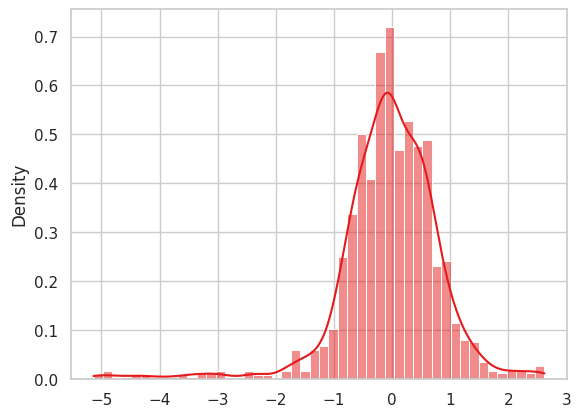

In [ ]:
sns.histplot(stage_2_wm.resid, kde=True, stat="density")

The residuals are skewed, but the data sample is large enough, so it's not a real problem in the model.

In [ ]:
subset_rest_med_df = rest_med_df.loc[:, ['year', 'origincontinentname','departingseats_mean', 'Average Per Passenger','pop_origin_mean', 'income_percapita_destination_city_mean','destination_population_mean', 'totalco2tonnes_mean', 'origincountryname',  'airport_ownership_public', 'airport_ownership_private', 'airport_ownership_ppp', 'airport_ownership_US']]

instr_variables_rest_med = subset_rest_med_df.loc[:, ['airport_ownership_public',	'airport_ownership_private',	'airport_ownership_ppp',	'airport_ownership_US']]

stage_1_rest_med_robust, stage_2_rest_med_robust, stage_2_rm = supply_elasticity_robust(subset_rest_med_df, instr_variables_rest_med)

print(stage_1_rest_med_robust, stage_2_rest_med_robust)

                      Robust linear Model Regression Results                     
Dep. Variable:     Average Per Passenger   No. Observations:                 1235
Model:                               RLM   Df Residuals:                     1207
Method:                             IRLS   Df Model:                           27
Norm:                             HuberT                                         
Scale Est.:                          mad                                         
Cov Type:                             H1                                         
Date:                   Tue, 07 Nov 2023                                         
Time:                           11:12:08                                         
No. Iterations:                       50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6873 

<Axes: ylabel='Density'>

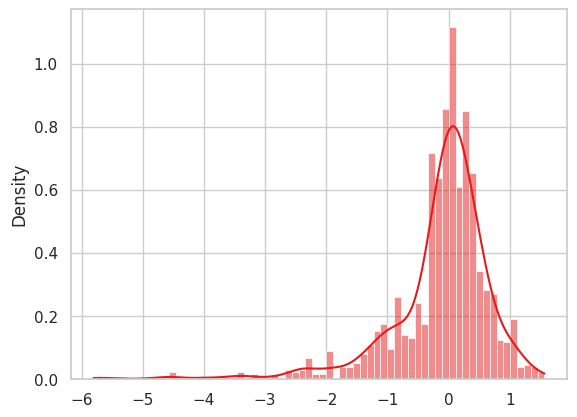

In [ ]:
sns.histplot(stage_2_rm.resid, kde=True, stat="density")

In [ ]:
subset_west_long_df = west_long_df.loc[:, ['year', 'origincontinentname','departingseats_mean','Average Per Passenger','pop_origin_mean', 'income_percapita_destination_city_mean','destination_population_mean', 'totalco2tonnes_mean', 'origincountryname',  'airport_ownership_public', 'airport_ownership_private', 'airport_ownership_ppp', 'airport_ownership_US']]

instr_variables_west_long = subset_west_long_df.loc[:, ['airport_ownership_public',	'airport_ownership_private',	'airport_ownership_ppp',	'airport_ownership_US']]

stage_1_west_long_robust, stage_2_west_long_robust, stage_2_wl = supply_elasticity_robust(subset_west_long_df, instr_variables_west_long)

print(stage_1_west_long_robust, stage_2_west_long_robust)

                      Robust linear Model Regression Results                     
Dep. Variable:     Average Per Passenger   No. Observations:                 1283
Model:                               RLM   Df Residuals:                     1254
Method:                             IRLS   Df Model:                           28
Norm:                             HuberT                                         
Scale Est.:                          mad                                         
Cov Type:                             H1                                         
Date:                   Tue, 07 Nov 2023                                         
Time:                           11:12:09                                         
No. Iterations:                       42                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4650 

<Axes: ylabel='Density'>

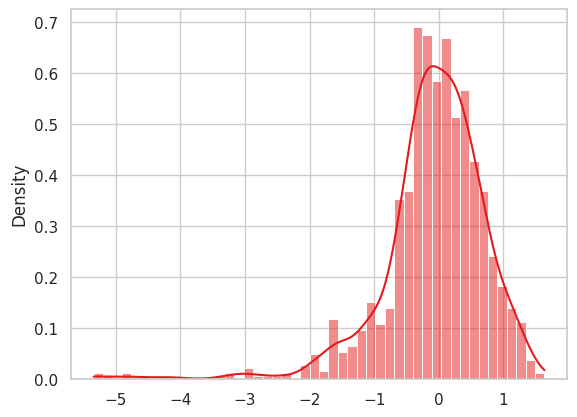

In [ ]:
sns.histplot(stage_2_wl.resid, kde=True, stat="density")

In [ ]:
subset_rest_long_df = rest_long_df.loc[:, ['year', 'origincontinentname','departingseats_mean', 'Average Per Passenger', 'pop_origin_mean', 'income_percapita_destination_city_mean','destination_population_mean', 'totalco2tonnes_mean', 'origincountryname',  'airport_ownership_public', 'airport_ownership_private', 'airport_ownership_ppp', 'airport_ownership_US']]

instr_variables_rest_long = subset_rest_long_df.loc[:, ['airport_ownership_public',	'airport_ownership_private',	'airport_ownership_ppp',	'airport_ownership_US']]

stage_1_rest_long_robust, stage_2_rest_long_robust, stage_2_rl = supply_elasticity_robust(subset_rest_long_df, instr_variables_rest_long)

print(stage_1_rest_long_robust, stage_2_rest_long_robust)

                      Robust linear Model Regression Results                     
Dep. Variable:     Average Per Passenger   No. Observations:                  476
Model:                               RLM   Df Residuals:                      447
Method:                             IRLS   Df Model:                           28
Norm:                             HuberT                                         
Scale Est.:                          mad                                         
Cov Type:                             H1                                         
Date:                   Tue, 07 Nov 2023                                         
Time:                           11:12:10                                         
No. Iterations:                       50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7914 

<Axes: ylabel='Density'>

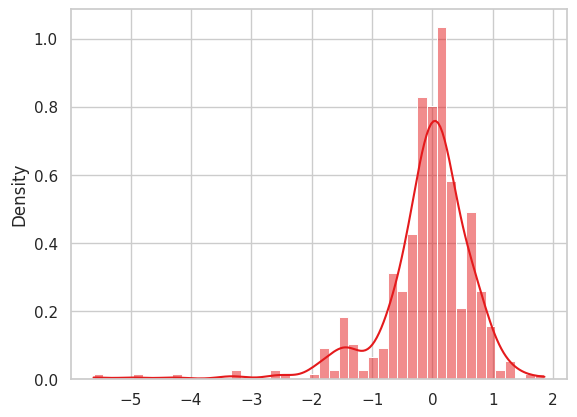

In [ ]:
sns.histplot(stage_2_rl.resid, kde=True, stat="density")

## **7. CO2 REDUCTION ESTIMATION**

In [ ]:
def CO2_estimation(data, instr_variables):

  # Apply the natural logarithm transformation to the specified columns
  log_columns = ['totalco2tonnes_mean', 'departingseats_mean', 'Average Per Passenger', 'income_percapita_destination_city_mean','pop_origin_mean', 'destination_population_mean']

  data[log_columns] = np.log(data[log_columns])

  y = data.loc[:, ['totalco2tonnes_mean']]
  endog_variable= data.loc[:, ['Average Per Passenger']]
  exog_variable = data.loc[:, ['pop_origin_mean', 'income_percapita_destination_city_mean', 'destination_population_mean']]

  #define fixed effects
  year_fe = pd.get_dummies(data['year'], drop_first=True)
  country_fe = pd.get_dummies(data['origincountryname'], drop_first=True)

  Z = np.hstack((sm.add_constant(exog_variable),instr_variables, year_fe, country_fe))

  stage_1 = sm.RLM(endog_variable, Z).fit()

  stage_1_coeff = np.array(stage_1.fittedvalues)

  X_hat = np.hstack((sm.add_constant(exog_variable), stage_1_coeff.reshape(-1,1), year_fe, country_fe))

  year_cols = year_fe.columns
  country_cols = country_fe.columns

  fe_cols = year_cols.to_list() + country_cols.to_list()

  columns_names = ['Constant', 'Population in the Region around the Airport of Departure', 'Per Capita Income in the Region of the Destination Airport', 'Population in the Region around the Destination Airport', 'Average Charge per Passenger' ]
  columns_names += fe_cols
  X_hat = pd.DataFrame(X_hat, columns = columns_names).reset_index(drop=True)

  y = pd.DataFrame(y).reset_index(drop=True)


  stage_2 = sm.RLM(y, X_hat).fit()

  return stage_1.summary(), stage_2.summary(), stage_2


In [ ]:
CO2_west_med_stage1, CO2_west_med_stage2, stage_2_emissions  = CO2_estimation(west_med_df, instr_variables_west_med)
print(CO2_west_med_stage1, CO2_west_med_stage2)

                      Robust linear Model Regression Results                     
Dep. Variable:     Average Per Passenger   No. Observations:                 1470
Model:                               RLM   Df Residuals:                     1441
Method:                             IRLS   Df Model:                           28
Norm:                             HuberT                                         
Scale Est.:                          mad                                         
Cov Type:                             H1                                         
Date:                   Tue, 07 Nov 2023                                         
Time:                           11:12:11                                         
No. Iterations:                       50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8771 

I estimate emissions only for the flight market combination that is significant in the supply estimation: medium-haul flights departing from Western countries.

## **8. RENDERING OF RESULTS IN LATEX FORMAT**

In [ ]:
#DATA DESCRIPTION

#rename_variables = ['Departing Seats', 'Total CO2 (tonnes)', 'Average Charge per Passenger', 'Population around the Departure Airport', 'Income PerCapita around the Destination Airport', 'Population around the Destination Airport']
data_description_wm = west_med_df.loc[:, ['departingseats_mean', 'totalco2tonnes_mean', 'Average Per Passenger',	'pop_origin_mean', 'income_percapita_destination_city_mean','destination_population_mean']]
data_description_wl = west_long_df.loc[:, ['departingseats_mean', 'totalco2tonnes_mean', 'Average Per Passenger',	'pop_origin_mean', 'income_percapita_destination_city_mean','destination_population_mean']]
data_description_rm = rest_med_df.loc[:, ['departingseats_mean', 'totalco2tonnes_mean', 'Average Per Passenger',	'pop_origin_mean', 'income_percapita_destination_city_mean','destination_population_mean']]
data_description_rl = rest_long_df.loc[:, ['departingseats_mean', 'totalco2tonnes_mean', 'Average Per Passenger',	'pop_origin_mean', 'income_percapita_destination_city_mean','destination_population_mean']]

columns_to_transform = ['pop_origin_mean', 'income_percapita_destination_city_mean', 'destination_population_mean']

# Apply the natural logarithm (log) transformation to the selected columns
data_description_wm[columns_to_transform] = data_description_wm[columns_to_transform].apply(np.log)
data_description_wl[columns_to_transform] = data_description_wl[columns_to_transform].apply(np.log)
data_description_rm[columns_to_transform] = data_description_rm[columns_to_transform].apply(np.log)
data_description_rl[columns_to_transform] = data_description_rl[columns_to_transform].apply(np.log)
#[['pop_origin_mean', 'income_percapita_destination_city_mean','destination_population_mean']] = data_description_wm['pop_origin_mean', 'income_percapita_destination_city_mean','destination_population_mean'].apply(np.log)
data_description_wm = data_description_wm.describe().T.drop(['count'], axis = 1)
data_description_wl = data_description_wl.describe().T.drop(['count'], axis = 1)
data_description_rm = data_description_rm.describe().T.drop(['count'], axis = 1)
data_description_rl = data_description_rl.describe().T.drop(['count'], axis = 1)

data_description_m = pd.concat([data_description_wm, data_description_rm], axis = 0)
data_description_l = pd.concat([data_description_wl, data_description_rl], axis = 0)
data_description_m = data_description_m.to_latex(float_format="%.2f")
data_description_l = data_description_l.to_latex(float_format="%.2f")

<ipython-input-96-f3e1870967d6>:24: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.

<ipython-input-96-f3e1870967d6>:25: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [ ]:
print(data_description_m)

\begin{tabular}{lrrrrrrr}
\toprule
{} &     mean &      std &    min &      25\% &      50\% &      75\% &       max \\
\midrule
departingseats\_mean                    &     9.84 &     1.08 &   4.84 &     9.42 &     9.96 &    10.57 &     12.15 \\
totalco2tonnes\_mean                    &     7.99 &     1.15 &   3.01 &     7.47 &     8.11 &     8.69 &     11.22 \\
Average Per Passenger                  &     3.87 &     0.51 &   2.71 &     3.55 &     3.97 &     4.29 &      4.83 \\
pop\_origin\_mean                        &     2.68 &     0.08 &   2.47 &     2.61 &     2.69 &     2.75 &      2.82 \\
income\_percapita\_destination\_city\_mean &     2.26 &     0.07 &   2.16 &     2.21 &     2.22 &     2.30 &      2.43 \\
destination\_population\_mean            &     2.77 &     0.07 &   2.59 &     2.70 &     2.80 &     2.83 &      2.83 \\
departingseats\_mean                    & 45859.29 & 39271.67 & 144.00 & 20533.33 & 34523.00 & 59970.12 & 260163.00 \\
totalco2tonnes\_mean              

In [ ]:
def latex_table(model1, model2):
  tab = summary_col([model1, model2], stars=True)
  latex_tab = tab.as_latex()
  print(latex_tab)

In [ ]:
tab1 = latex_table(stage_2_wm, stage_2_wl)

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{lll}
\hline
                                                           & departingseats\_mean I & departingseats\_mean II  \\
\hline
Constant                                                   & 6.8461***              & 20.8740***               \\
                                                           & (1.5692)               & (6.8147)                 \\
Population in the Region around the Airport of Departure   & 0.3219***              & 0.2004***                \\
                                                           & (0.0394)               & (0.0518)                 \\
Per Capita Income in the Region of the Destination Airport & -0.1383**              & -1.1984                  \\
                                                           & (0.0654)               & (0.8440)                 \\
Population in the Region around the Airport of Destination & 0.2026***              & -0.0880**                \\
    

In [ ]:
tab2 = latex_table(stage_2_rm, stage_2_rl)

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{lll}
\hline
                                                           & departingseats\_mean I & departingseats\_mean II  \\
\hline
Average Charge per Passenger                               & -0.1738                & 2.2158                   \\
                                                           & (0.9047)               & (1.6788)                 \\
Constant                                                   & -0.2361                & 1.2009                   \\
                                                           & (0.4404)               & (1.1052)                 \\
Per Capita Income in the Region of the Destination Airport & -0.0929                & -1.4637*                 \\
                                                           & (0.0586)               & (0.8546)                 \\
Population in the Region around the Airport of Departure   & 0.3239***              & 1.0597***                \\
    

/usr/local/lib/python3.10/dist-packages/statsmodels/iolib/summary2.py:523: RuntimeWarning:

The values in the array are unorderable. Pass `sort=False` to suppress this warning.



In [ ]:
data_description_l

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n{} &     mean &      std &    min &      25\\% &      50\\% &      75\\% &       max \\\\\n\\midrule\ndepartingseats\\_mean                    & 51187.72 & 39924.72 & 271.00 & 26076.50 & 39815.50 & 64627.00 & 258724.33 \\\\\ntotalco2tonnes\\_mean                    & 26566.32 & 23959.89 & 100.84 & 12350.07 & 19655.86 & 33397.40 & 171213.64 \\\\\nAverage Per Passenger                  &    72.30 &    33.30 &  14.92 &    49.52 &    71.31 &    83.09 &    192.61 \\\\\npop\\_origin\\_mean                        &    15.14 &     0.98 &  11.82 &    14.74 &    15.28 &    15.69 &     16.75 \\\\\nincome\\_percapita\\_destination\\_city\\_mean &    10.84 &     0.21 &  10.55 &    10.64 &    10.77 &    11.07 &     11.10 \\\\\ndestination\\_population\\_mean            &    16.09 &     0.99 &  13.51 &    16.01 &    16.30 &    16.75 &     16.75 \\\\\ndepartingseats\\_mean                    & 55439.19 & 41603.36 & 174.00 & 27952.67 & 44683.50 & 71226.38 & 21024

In [ ]:
merged_df_latex = merged_df[['originairportname', 'origincityname', 'origincountryname', 'origincontinentname']].drop_duplicates()
merged_df_latex = merged_df_latex.reset_index(drop=True)
merged_df_latex = merged_df_latex.to_latex()
print(merged_df_latex)

\begin{tabular}{lllll}
\toprule
{} &                                 originairportname &     origincityname &         origincountryname & origincontinentname \\
\midrule
0  &                             Amsterdam - Schiphol  &          Amsterdam &               Netherlands &              Europe \\
1  &                              Stockholm - Arlanda  &          Stockholm &                    Sweden &              Europe \\
2  &     Athens - Eleftherios Venizelos International  &             Athens &                    Greece &              Europe \\
3  &         Hartsfield-Jackson Atlanta International  &            Atlanta &             United States &       North America \\
4  &                          Abu Dhabi International  &          Abu Dhabi &      United Arab Emirates &         Middle East \\
5  &                                        Barcelona  &          Barcelona &  Spain and Canary Islands &              Europe \\
6  &             Bangkok - Suvarnabhumi International  &

<ipython-input-103-35bb97ca09aa>:3: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [ ]:
tab = summary_col(stage_2_emissions, stars=True)
latex_tab = tab.as_latex()
print(latex_tab)

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{ll}
\hline
                                                           & totalco2tonnes\_mean  \\
\hline
Constant                                                   & 6.9762***             \\
                                                           & (1.6500)              \\
Population in the Region around the Airport of Departure   & 0.3996***             \\
                                                           & (0.0414)              \\
Per Capita Income in the Region of the Destination Airport & -0.1989***            \\
                                                           & (0.0688)              \\
Population in the Region around the Destination Airport    & 0.1803***             \\
                                                           & (0.0514)              \\
Average Charge per Passenger                               & -1.3898***            \\
                                                         